# Homophilic Network Analysis on UK Gangs

In [38]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Acquisition (1)

In [40]:
###Reading CSV file

data = pd.read_csv('/content/drive/MyDrive/WebTopology/LONDON_GANG.csv')
data = data.drop([0]) #first row is dropped because it has no values
data

Id  Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  \
1    1   20           1          0       16            4       1      1   
2    2   20           2          0       16            7       1      0   
3    3   19           2          0       12            4       1      0   
4    4   21           2          0        8            1       0      0   
5    5   24           2          0       11            3       0      0   
6    6   25           3          1       17           10       0      0   
7    7   20           4          1        8            1       0      1   
8    8   21           1          0       15            6       1      1   
9    9   20           1          1        9            3       0      0   
10  10   23           1          1       12            4       1      1   
11  11   21           1          0       16            8       1      0   
12  12   25           3          0        5            3       0      1   
13  13   21           3          0       19            9       1      0   
14  14   19           3          0       23            9       0      1   
15  15   21           3          0       12            9       1      0   
16  16   19           3          0       14            7       1      0   
17  17   27           2          0       14            8       0      0   
18  18   25           2          0       23           13       1      0   
19  19   20           2          1       22            9       1      0   
20  20   20           1          1        8            2       0      0   
21  21   23           1          0        4            5       0      1   
22  22   20           1          0        5            2       0      1   
23  23   19           4          0       19            9       1      0   
24  24   16           4          0        0            0       0      0   
25  25   17           4          0        8            2       1      0   
26  26   18           4          0        0            0       0      0   
27  27   17           3          0        3            1       0      1   
28  28   22           3          1        2            0       1      0   
29  29   18           2          1        7            3       1      0   
30  30   19           2          1        6            3       1      0   
31  31   17           1          0       12            4       0      0   
32  32   16           1          0       13            3       0      0   
33  33   18           3          1       15            6       0      0   
34  34   17           3          1        2            1       1      0   
35  35   18           3          1        7            3       0      0   
36  36   17           3          1        7            2       1      0   
37  37   17           3          0        6            1       0      0   
38  38   20           2          0        6            2       0      0   
39  39   22           3          1        4            3       0      0   
40  40   23           1          1       18           12       1      0   
41  41   19           2          1        8            1       0      0   
42  42   18           3          0        7            4       0      0   
43  43   18           3          1        6            0       0      0   
44  44   18           3          1        7            1       0      0   
45  45   19           3          0       23           11       1      0   
46  46   18           3          0        5            2       1      0   
47  47   16           3          1        1            0       0      0   
48  48   20           3          1       12            9       1      0   
49  49   19           2          0        3            0       0      0   
50  50   19           1          0        3            1       0      0   
51  51   17           3          0        4            1       0      0   
52  52   18           3          0        1            0       0      0   
53  53   27           4      

### ATTRIBUTES
* Creating a dataframe with the correspondeces of the birthplaces

In [41]:
nationalities = {'Birthplace': [1, 2,3,4], 'Country': ['West Africa', 'Caribbean', 'UK','East Africa']}
nationalities = pd.DataFrame(data=nationalities)
nationalities

Birthplace      Country
0           1  West Africa
1           2    Caribbean
2           3           UK
3           4  East Africa

* Now we can merge the two dataframes

In [42]:
data = pd.merge(data,nationalities , on='Birthplace')
data

Id  Age  Birthplace  Residence  Arrests  Convictions  Prison  Music  \
0    1   20           1          0       16            4       1      1   
1    8   21           1          0       15            6       1      1   
2    9   20           1          1        9            3       0      0   
3   10   23           1          1       12            4       1      1   
4   11   21           1          0       16            8       1      0   
5   20   20           1          1        8            2       0      0   
6   21   23           1          0        4            5       0      1   
7   22   20           1          0        5            2       0      1   
8   31   17           1          0       12            4       0      0   
9   32   16           1          0       13            3       0      0   
10  40   23           1          1       18           12       1      0   
11  50   19           1          0        3            1       0      0   
12   2   20           2          0       16            7       1      0   
13   3   19           2          0       12            4       1      0   
14   4   21           2          0        8            1       0      0   
15   5   24           2          0       11            3       0      0   
16  17   27           2          0       14            8       0      0   
17  18   25           2          0       23           13       1      0   
18  19   20           2          1       22            9       1      0   
19  29   18           2          1        7            3       1      0   
20  30   19           2          1        6            3       1      0   
21  38   20           2          0        6            2       0      0   
22  41   19           2          1        8            1       0      0   
23  49   19           2          0        3            0       0      0   
24   6   25           3          1       17           10       0      0   
25  12   25           3          0        5            3       0      1   
26  13   21           3          0       19            9       1      0   
27  14   19           3          0       23            9       0      1   
28  15   21           3          0       12            9       1      0   
29  16   19           3          0       14            7       1      0   
30  27   17           3          0        3            1       0      1   
31  28   22           3          1        2            0       1      0   
32  33   18           3          1       15            6       0      0   
33  34   17           3          1        2            1       1      0   
34  35   18           3          1        7            3       0      0   
35  36   17           3          1        7            2       1      0   
36  37   17           3          0        6            1       0      0   
37  39   22           3          1        4            3       0      0   
38  42   18           3          0        7            4       0      0   
39  43   18           3          1        6            0       0      0   
40  44   18           3          1        7            1       0      0   
41  45   19           3          0       23           11       1      0   
42  46   18           3          0        5            2       1      0   
43  47   16           3          1        1            0       0      0   
44  48   20           3          1       12            9       1      0   
45  51   17           3          0        4            1       0      0   
46  52   18           3          0        1            0       0      0   
47  54   20           3          0       11            4       1      0   
48   7   20           4          1        8            1       0      1   
49  23   19           4          0       19            9       1      0   
50  24   16           4          0        0            0       0      0   
51  25   17           4          0        8            2       1      0   
52  26   18           4      

* Mean & Median statistics

In [43]:
print("---MEAN--- ")
print(data[['Age','Arrests','Convictions']].mean())
print("---MEDIAN-- ")
print(data[['Age','Arrests','Convictions']].median())

---MEAN--- 
Age            19.833333
Arrests         9.907407
Convictions     4.203704
dtype: float64
---MEDIAN-- 
Age            19.0
Arrests         8.0
Convictions     3.0
dtype: float64


* Max & Min statistics

In [44]:
print("---MAX--- ")
print(data[['Age','Arrests','Convictions']].max())
print("---MIN--- ")
print(data[['Age','Arrests','Convictions']].min())

---MAX--- 
Age            27
Arrests        23
Convictions    13
dtype: int64
---MIN--- 
Age            16
Arrests         0
Convictions     0
dtype: int64


##Data Visualization

<ipython-input-45-003909ae9276>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= data.Age.value_counts().index ,


Text(0.5, 0, 'Age')

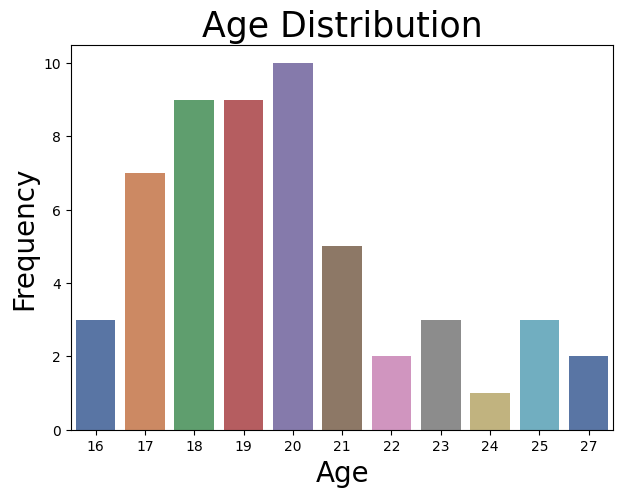

In [45]:
##FREQUENCY OF EACH AGE

fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= data.Age.value_counts().index ,
            y =data.Age.value_counts().values,
            palette='deep', )
plt.title('Age Distribution', fontdict ={'size': 25}, loc='center')
plt.ylabel('Frequency',fontdict ={'size': 20})
plt.xlabel('Age',fontdict ={'size': 20})

<ipython-input-46-feaa0affca10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= ['Served','Never in Jail'] ,


(0.0, 100.0)

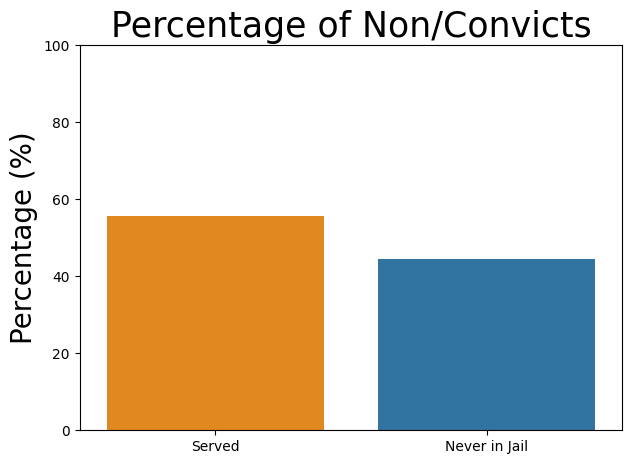

In [46]:
##FREQUENCY OF MEMBERS THAT WERE IN JAIL

fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['Served','Never in Jail'] ,
            y =data.Prison.value_counts()/sum(data.Prison.value_counts())*100,
            palette=['darkorange','tab:blue'], )
plt.title('Percentage of Non/Convicts', fontdict ={'size': 25}, loc='center')
plt.ylabel('Percentage (%)',fontdict ={'size': 20})
ax.set_ylim(0, 100)

<ipython-input-47-51e05b75a5c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y= data.Country.value_counts().index ,


Text(0, 0.5, 'Country')

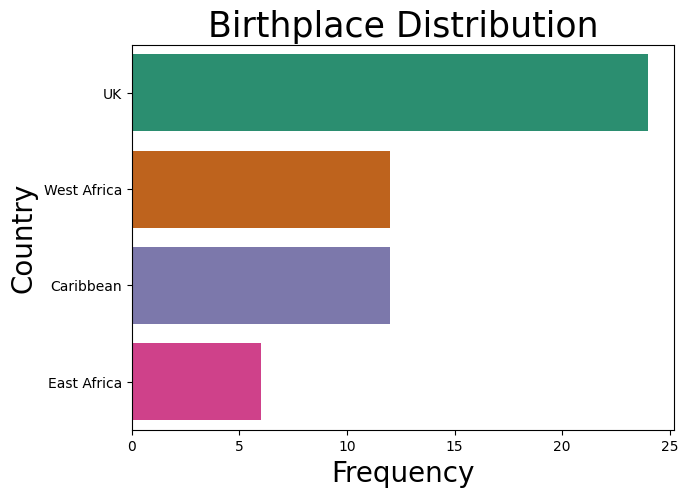

In [47]:
## GANG MEMBER FREQUENCY OF NATIONALITIES (MEMBERS PER BIRTHPLACE)

fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= data.Country.value_counts().index ,
            x =data.Country.value_counts().values,
            palette='Dark2', )
plt.title('Birthplace Distribution', fontdict ={'size': 25}, loc='center')
plt.xlabel('Frequency',fontdict ={'size': 20})
plt.ylabel('Country',fontdict ={'size': 20})

In [48]:
print((data.Country.value_counts()/ sum(data.Country.value_counts()))*100) ##PERCENTAGE OF NATIONALITY POPULATION

Country
UK             44.444444
West Africa    22.222222
Caribbean      22.222222
East Africa    11.111111
Name: count, dtype: float64


<ipython-input-49-3199597d1250>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= ['Normal','Music Maker'] ,


(0.0, 100.0)

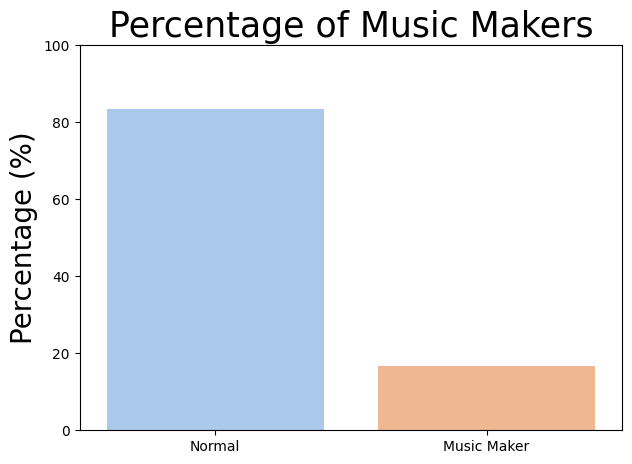

In [49]:
## FREQUENCY OF MUSICIANS/NOT

fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= ['Normal','Music Maker'] ,
            y =data.Music.value_counts()/sum(data.Music.value_counts())*100,
            palette='pastel', )
plt.title('Percentage of Music Makers', fontdict ={'size': 25}, loc='center')
plt.ylabel('Percentage (%)',fontdict ={'size': 20})
ax.set_ylim(0, 100)

<ipython-input-50-d818c857c667>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= data.Ranking.value_counts().index ,


Text(0.5, 0, 'Ranking')

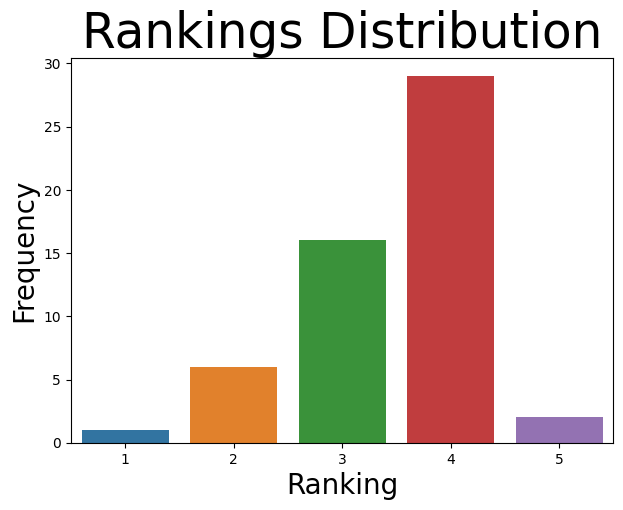

In [50]:
## FREQUENCY OF RATINGS OF EACH MEMBER

fig_dims = (7, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(x= data.Ranking.value_counts().index ,
            y =data.Ranking.value_counts(),
            palette='tab10', )
plt.title('Rankings Distribution', fontdict ={'size': 35}, loc='center')
plt.ylabel('Frequency',fontdict ={'size': 20})
plt.xlabel('Ranking',fontdict ={'size': 20})

<ipython-input-51-c4f3ffbf0c50>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Age', y='Country', inner='stick', palette='Dark2')


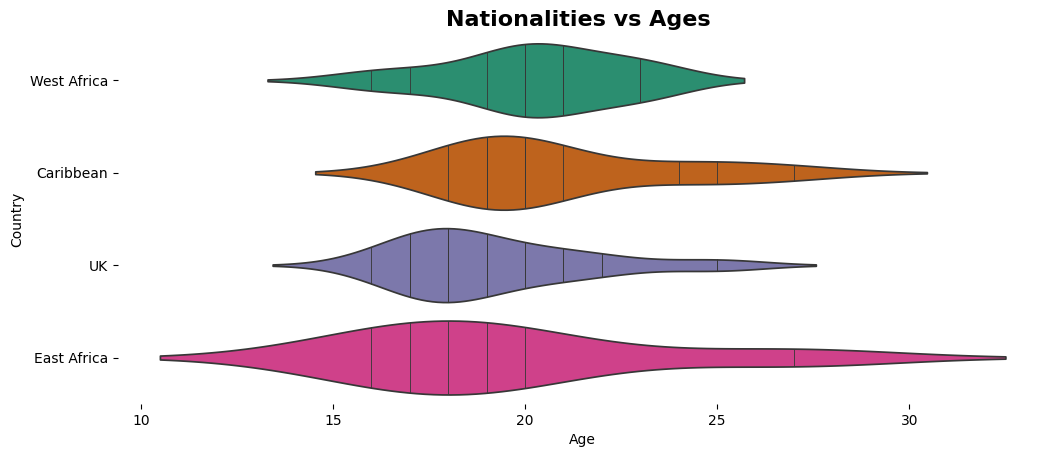

In [51]:
# MEMBER FREQUENCY OF AGE BY COUNTRY
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Age', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Nationalities vs Ages ", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

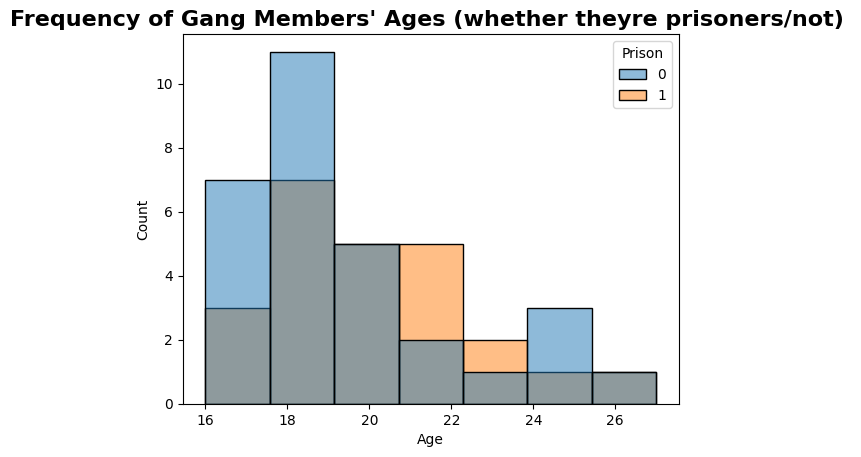

In [52]:
#FREQUENCY OF PRISONERS BY AGE
sns.histplot(x = 'Age', hue = 'Prison', data = data)
plt.title("Frequency of Gang Members' Ages (whether theyre prisoners/not) ", fontsize=16, fontweight="bold")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Arrests vs Country')

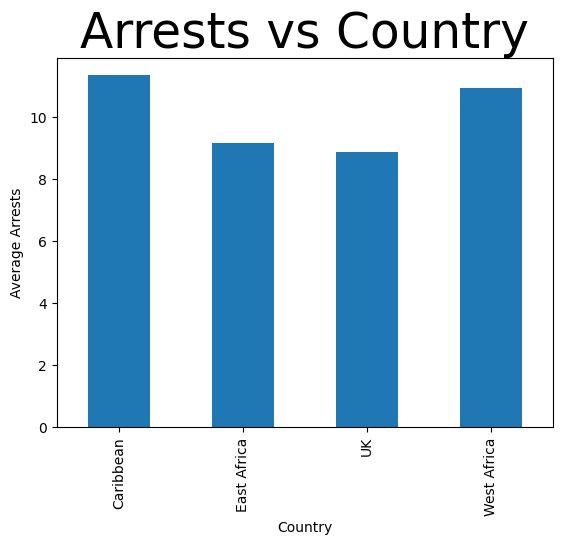

In [53]:
#FREQUENCY OF ARRESTS BY COUNTRY
data.groupby('Country')['Arrests'].mean().plot(kind='bar')
plt.xlabel('Country')
_ = plt.ylabel('Average Arrests')
plt.title('Arrests vs Country', fontdict ={'size': 35}, loc='center')

Text(0.5, 1.0, 'Arrests vs Convictions')

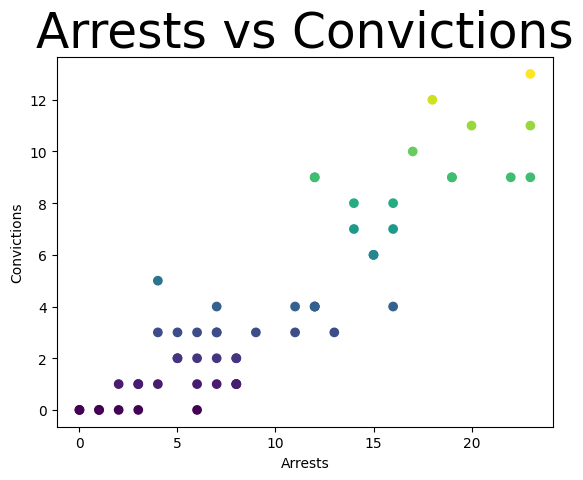

In [54]:
#CONVICTION FREQUENCY OF EACH MEMBER BY ARRESTS
plt.scatter(data['Arrests'], data['Convictions'], c=data['Convictions'])
plt.xlabel('Arrests')
_ = plt.ylabel('Convictions')
plt.title('Arrests vs Convictions', fontdict ={'size': 35}, loc='center')

## Data Acquisition (2): Adjacency matrix that describes the edges of the graph

In [55]:
edges = pd.read_csv('/content/drive/MyDrive/WebTopology/LONDON_GANG_ADJMATRIX.csv', index_col=0)
edges.columns = edges.columns.astype(int) #changing columns names to integer type
edges

1   2   3   4   5   6   7   8   9   10  ...  45  46  47  48  49  50  51  \
1    0   1   1   2   1   1   2   3   2   2  ...   1   1   0   0   0   0   1   
2    1   0   3   0   0   2   1   2   1   2  ...   0   0   0   0   0   0   0   
3    1   3   0   4   4   3   1   3   2   2  ...   0   0   0   0   0   0   0   
4    2   0   4   0   4   3   1   0   0   0  ...   0   0   0   0   1   0   0   
5    1   0   4   4   0   3   1   0   1   1  ...   0   0   1   0   1   0   0   
6    1   2   3   3   3   0   1   0   0   0  ...   0   0   0   0   1   0   0   
7    2   1   1   1   1   1   0   1   2   2  ...   0   1   1   1   0   0   0   
8    3   2   3   0   0   0   1   0   2   2  ...   0   0   0   0   0   0   0   
9    2   1   2   0   1   0   2   2   0   4  ...   0   1   0   0   0   0   0   
10   2   2   2   0   1   0   2   2   4   0  ...   0   0   0   0   0   0   0   
11   3   2   0   0   0   0   1   1   1   1  ...   0   0   0   1   0   0   1   
12   1   1   1   1   1   1   1   1   1   1  ...   0   0   0   0   0   0   0   
13   0   1   1   2   3   2   0   0   1   1  ...   0   0   0   0   0   0   0   
14   0   3   3   3   3   3   1   1   0   0  ...   0   0   0   0   0   0   0   
15   0   0   1   1   1   1   0   0   0   0  ...   0   0   0   0   0   0   0   
16   0   2   0   0   0   0   2   0   0   0  ...   0   0   0   0   0   0   0   
17   1   0   0   2   2   2   0   0   0   0  ...   0   0   0   0   0   0   0   
18   1   1   1   2   2   2   1   0   0   0  ...   0   0   0   0   0   0   2   
19   0   0   0   1   1   1   1   0   0   0  ...   0   0   0   0   0   1   1   
20   2   0   0   1   1   1   0   0   2   2  ...   0   0   0   0   0   1   1   
21   2   1   1   0   0   0   3   1   1   1  ...   0   0   0   0   0   0   0   
22   3   2   1   0   0   0   2   1   3   2  ...   0   0   0   0   0   0   0   
23   1   2   0   2   2   2   1   1   3   3  ...   0   0   0   2   0   0   0   
24   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
25   1   1   0   1   1   0   1   0   2   2  ...   0   0   0   2   0   0   0   
26   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
27   1   0   0   0   0   0   1   1   0   1  ...   0   0   0   0   0   0   0   
28   1   1   0   1   0   0   0   0   1   1  ...   0   0   0   0   0   0   0   
29   1   3   1   0   0   0   1   1   2   2  ...   0   0   0   0   0   0   0   
30   0   2   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
31   0   2   0   0   0   0   0   2   2   2  ...   0   0   0   0   0   0   0   
32   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
33   0   0   2   0   0   0   2   0   0   0  ...   0   0   0   0   0   0   0   
34   0   0   2   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
35   0   0   2   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
36   0   0   2   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
37   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
38   0   2   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
39   0   0   0   0   0   0   0   0   1   2  ...   0   0   0   0   0   0   0   
40   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
41   0   0   0   1   0   0   0   0   1   1  ...   0   0   0   0   0   0   0   
42   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   2   
43   1   0   0   0   0   0   0   0   0   0  ...   0   2   0   0   0   0   2   
44   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
45   1   0   0   0   0   0   0   0   0   0  ...   0   2   0   0   0   0   0   
46   1   0   0   0   0   0   1   0   1   0  ...   2   0   0   0   0   0   0   
47   0   0   0   0   1   0   1   0   0   0  ...   0   0   0   1   0   0   0   
48   0   0   0   0   0   0   1   0   0   0  ...   0   0   1   0   0   0   0   
49   0   0   0   1   1   1   0   0   0   0  ...   0   0   0   0   0   0   0   
50   0   0   0   0   0   0   0   0   0   0  ...   0   

In [56]:
##Creating a networkx graph from the adj matrix
G = nx.from_pandas_adjacency(edges)
G

###Capturing Graph Data

In [57]:
##Printing Graph Information
print("Graph Diameter: ", nx.diameter(G))  ## Longest shortest path between any two vertices in the graph
print("Graph Density: ", nx.density(G))    ## Ratio of number of edges in the graph to the maximum possible number of edges, indicating how connected the graph is.
print("Graph Shortest Path: ", nx.average_shortest_path_length(G))

Graph Diameter:  4
Graph Density:  0.22012578616352202
Graph Shortest Path:  2.0538085255066387


#### Degree Measures

In [58]:
##Creating new dataframe is created with the degree for each node
degrees = pd.DataFrame.from_dict(nx.degree(G))
degrees = degrees.rename(columns={0:'node', 1:'degree'})
degrees ##the number of edges/vertex

node  degree
0     54       6
1     53       2
2     52       4
3     51       7
4     50       2
5     49       3
6     48       5
7     47       3
8     46       5
9     45       2
10    44       4
11    43       6
12    42       5
13    41       5
14    40       2
15    39       2
16    38       2
17    37       7
18    36      12
19    35      12
20    34       8
21    33      10
22    32       7
23    31      12
24    30       5
25    29      17
26    28      18
27    27       8
28    26       6
29    25      23
30    24       6
31    23      23
32    22      24
33    21      19
34    20      15
35    19      13
36    18      14
37    17       5
38    16       8
39    15       7
40    14      24
41    13      11
42    12      25
43    11      18
44    10      22
45     9      21
46     8      15
47     7      25
48     6      16
49     5      19
50     4      21
51     3      22
52     2      22
53     1      25

In [59]:
##Printing Graph's Degree Information
print("Average Degree: ", degrees.degree.mean())
print("Max Degree: ", degrees.degree.max())
print("Median Degree: ", degrees.degree.median())
print("Min Degree: ", degrees.degree.min())

Average Degree:  11.666666666666666
Max Degree:  25
Median Degree:  9.0
Min Degree:  2


####Centrality Measures

In [86]:
##Printing Graph's Centrality Information
print("Betweenness centrality/node: \n", max(nx.betweenness_centrality(G).values())) ## quantifies how often a node lies on the shortest path between other nodes. It captures the importance of a node as a bridge connecting different parts of the network.
print("Closeness centrality/node: \n", max(nx.closeness_centrality(G).values()))     ##how quickly a node can reach other nodes in the network. It focuses on the average distance from a node to all other nodes.
print("Eigenvector centrality/node: \n", max(nx.eigenvector_centrality(G).values())) ##considers a node’s influence based on the influence of its neighbors. A node is important if it is connected to other important nodes.

Betweenness centrality/node: 
 0.10866809640139247
Closeness centrality/node: 
 0.654320987654321
Eigenvector centrality/node: 
 0.24942870058999017


### Correlation Regression
* I'd like to investigate the correlation between two variables when we believe there is some kind of relationship among them.
* I do believe that there is a some sort of correlation between the member's age and convictions.
* There is a high positive linear correlation between the two variables since the coefficients (pearson & spearson) are around $0.5$

In [61]:
import scipy.stats.stats as stats
print(stats.pearsonr(data.Age, data.Convictions))
print(stats.spearmanr(data.Age, data.Convictions))

PearsonRResult(statistic=0.5436500726435033, pvalue=2.153194888369744e-05)
SignificanceResult(statistic=0.5341642864184695, pvalue=3.181407458662108e-05)


<ipython-input-61-139341efdba7>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print(stats.pearsonr(data.Age, data.Convictions))
<ipython-input-61-139341efdba7>:3: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print(stats.spearmanr(data.Age, data.Convictions))


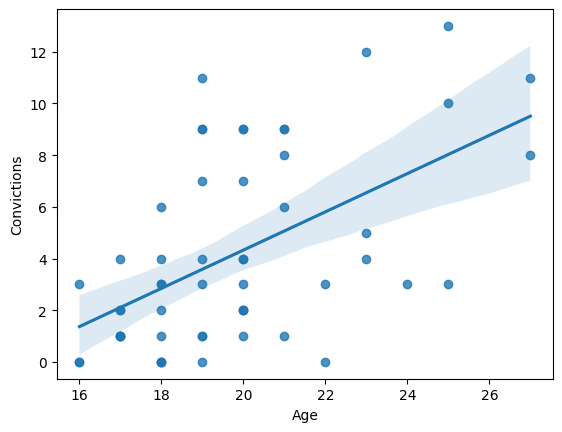

In [63]:
##Age and Conviction prove to have a higher correlation

import seaborn as sns;
ax = sns.regplot(x="Age", y="Convictions", data=data)

Text(0.5, 1.0, 'Any Other Data Correlation?')

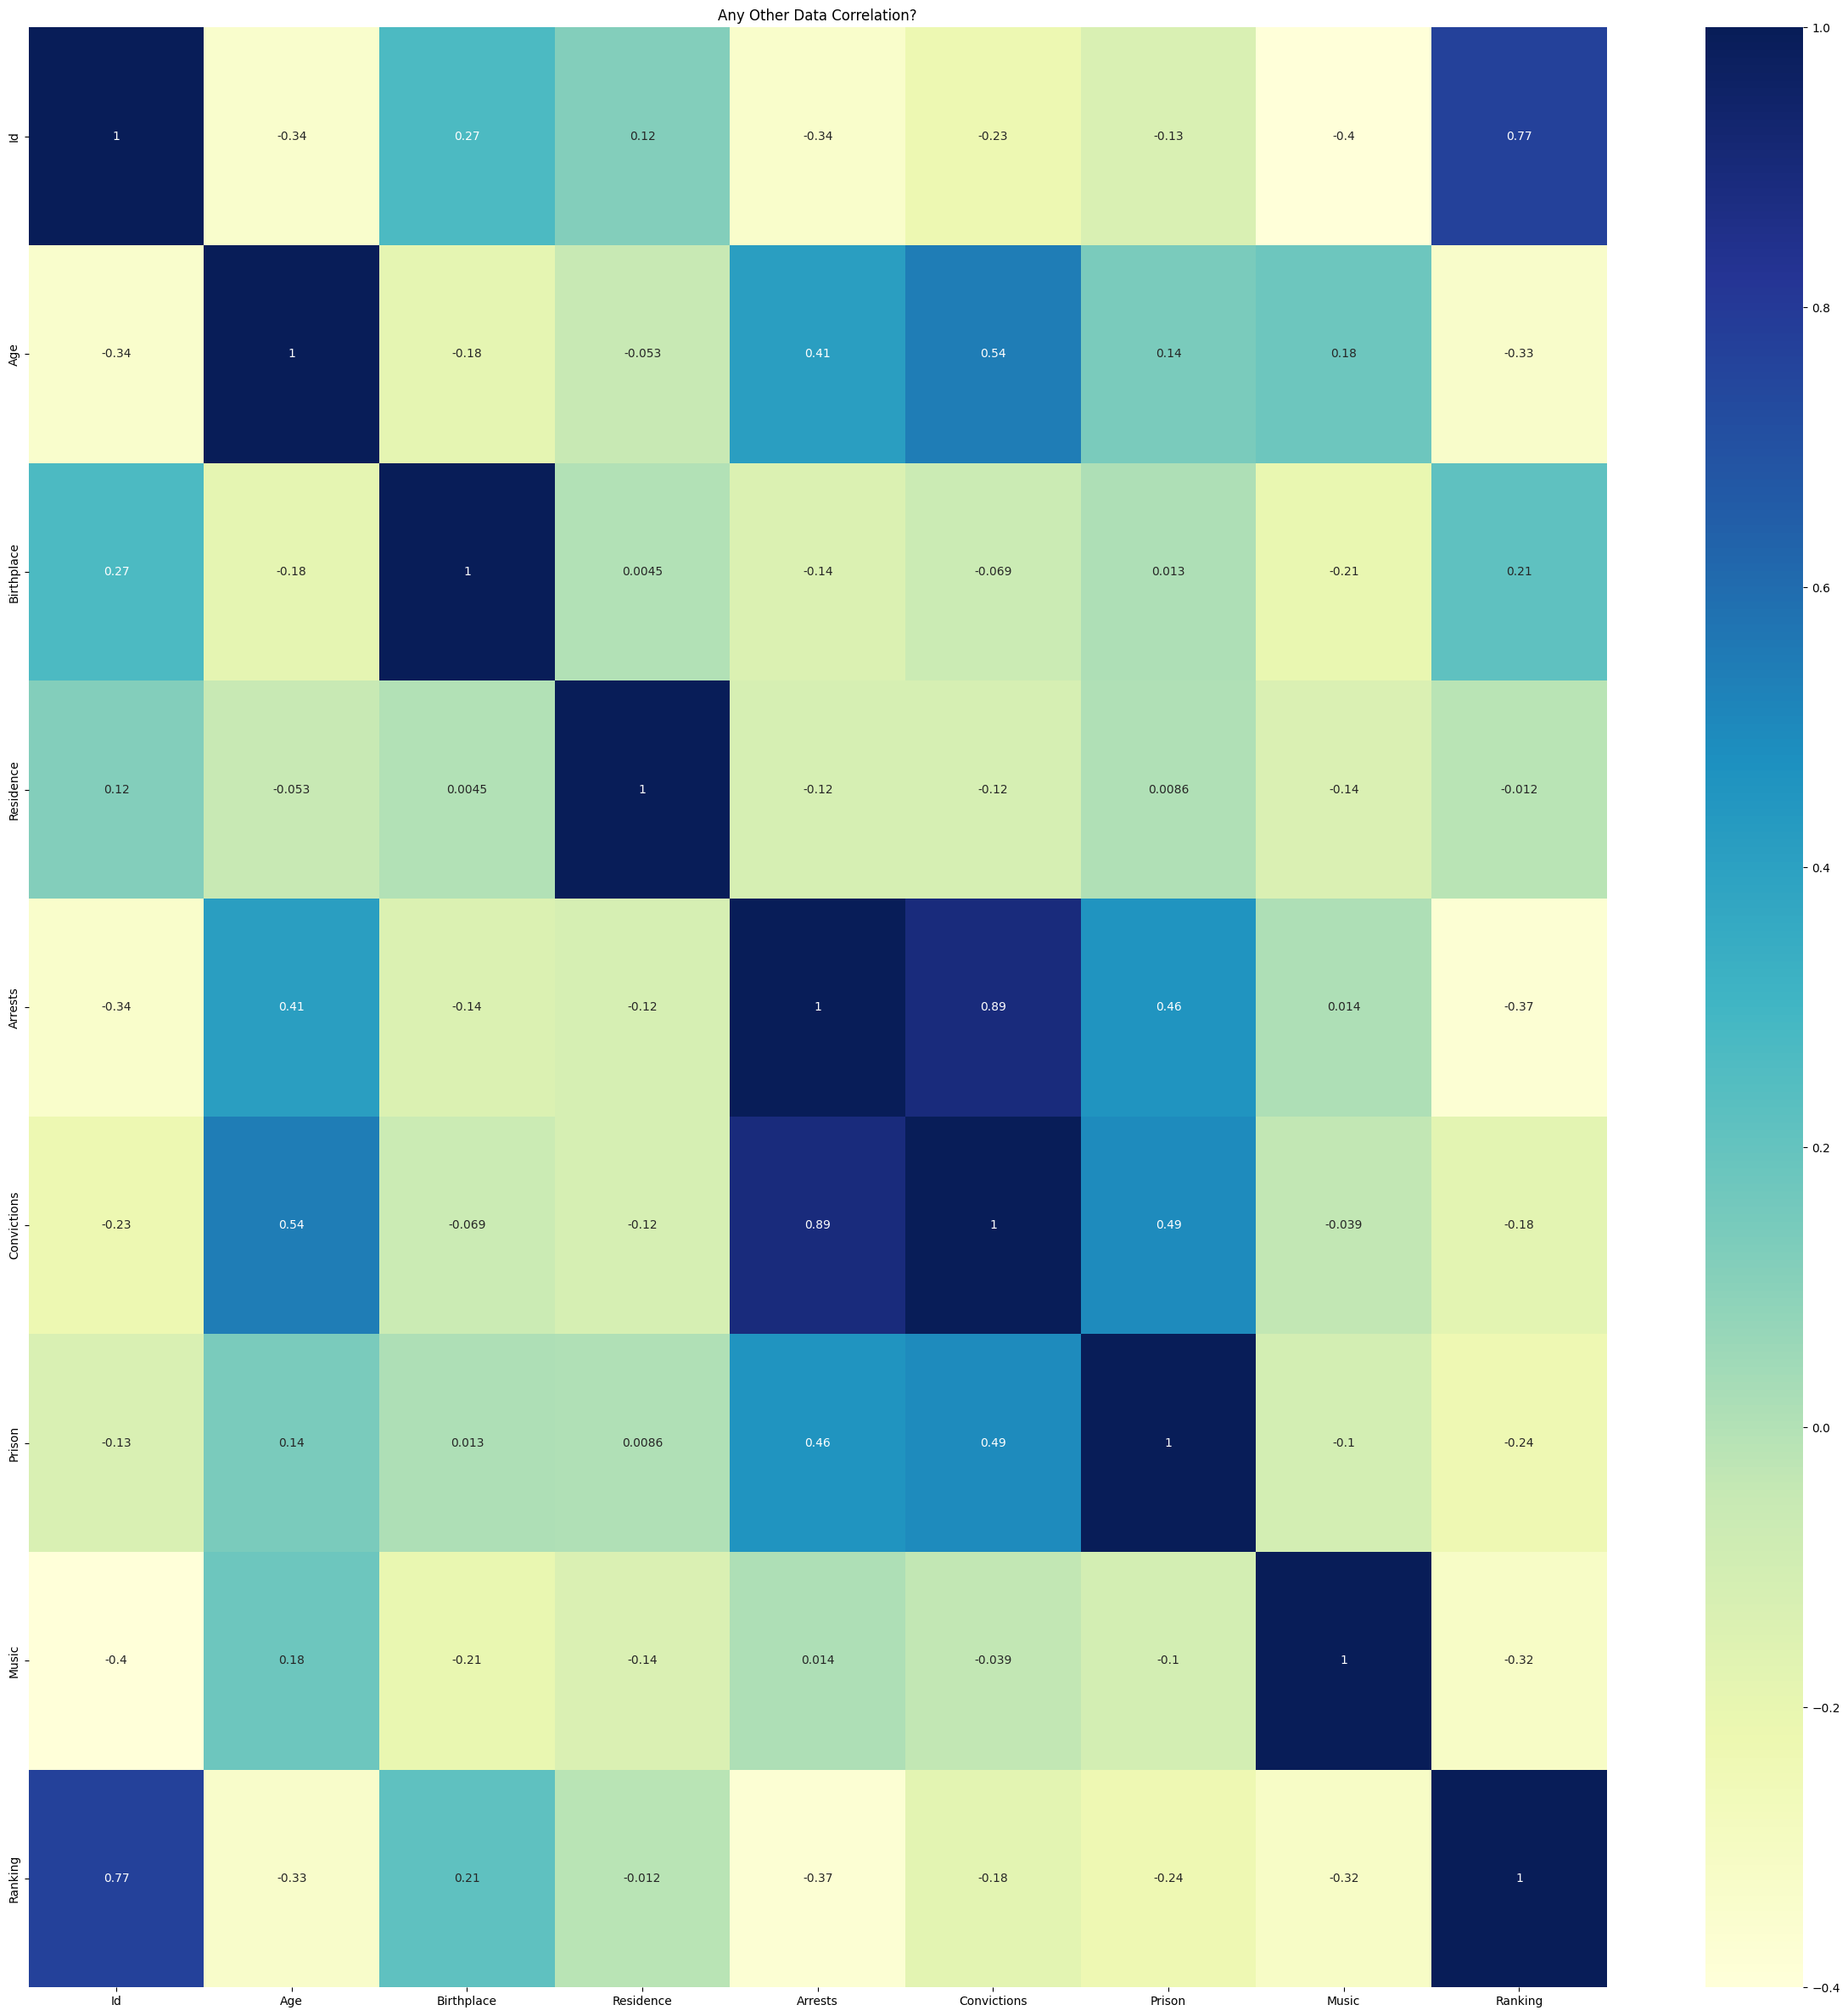

In [62]:
##Any other correlation of the dataset
plt.figure(figsize=(30,30))
df=data.iloc[:, :-1]
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu").set_title('Any Other Data Correlation?')

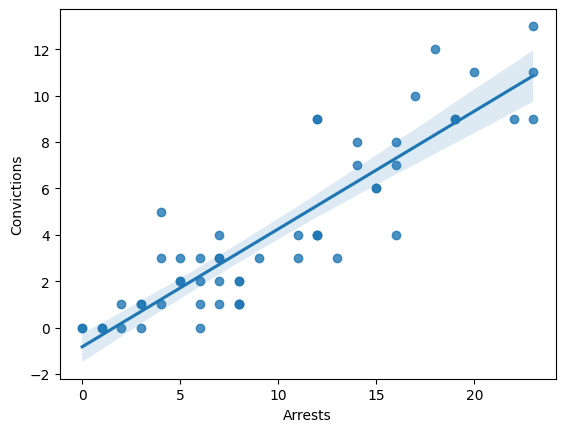

In [64]:
##Arrests and Conviction prove to have a higher correlation

import seaborn as sns;
ax = sns.regplot(x="Arrests", y="Convictions", data=data)

In [87]:
print(stats.pearsonr(data.Arrests, data.Convictions))
print(stats.spearmanr(data.Arrests, data.Convictions))

PearsonRResult(statistic=0.8923835418070595, pvalue=1.3193177097878662e-19)
SignificanceResult(statistic=0.8719833142074431, pvalue=9.281634563718199e-18)


<ipython-input-87-b95b14306d6d>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print(stats.pearsonr(data.Arrests, data.Convictions))
<ipython-input-87-b95b14306d6d>:2: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print(stats.spearmanr(data.Arrests, data.Convictions))


#### Clustering Coeff

In [65]:
print('Average clustering coeeficient: ', nx.average_clustering(G,)) ##quantifies how close its neighbors are to forming a clique (a complete graph).

Average clustering coeeficient:  0.6331465409311988


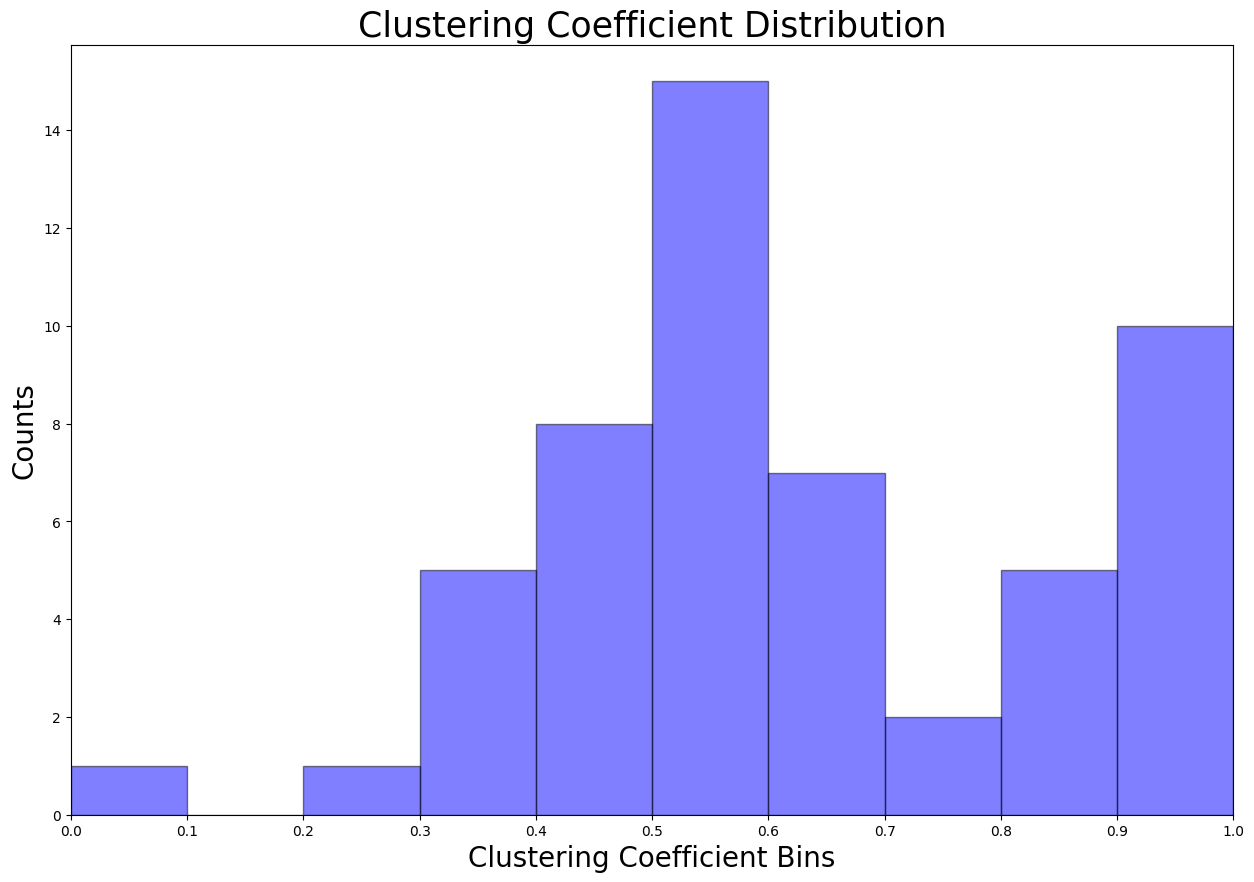

In [66]:
##Creating a histogram to showcase the clustering coefficient distribution

cluster_values = list(nx.clustering(G).values()) #creating list from dictionary values of clustering coefficients
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
plt.hist(bins=np.linspace(0., 1., 11), x=cluster_values,
                        color='blue', edgecolor='black', alpha=0.5, )
ax.set_xlim(0, 1)
plt.xticks(np.linspace(0., 1., 11))
plt.title('Clustering Coefficient Distribution', fontdict ={'size': 25}, loc='center')
plt.xlabel('Clustering Coefficient Bins',fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})
plt.show()

### Homophily

In [67]:
##Set up columns for each node
node_attr = data.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G, node_attr)

In [68]:
##Printing Graph's Homophily Information (per column)
print("Assortativity Coefficient: \n", nx.degree_assortativity_coefficient(G))
print("Attribute Birthplace for all nodes: \n", nx.get_node_attributes(G,'Birthplace'))
print("Attribute Country for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Country'))
print("Attribute Prison for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Prison'))
print("Attribute Music for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Music'))
print("Attribute Ranking for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Ranking'))

############Numerical Attributes
print("Attribute Age for all nodes: \n", nx.numeric_assortativity_coefficient(G,'Age'))
print("Attribute Arrests for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Arrests'))
print("Attribute Convictions for all nodes: \n", nx.attribute_assortativity_coefficient(G,'Convictions'))

Assortativity Coefficient: 
 0.022624526934103342
Attribute Birthplace for all nodes: 
 {54: 3, 53: 4, 52: 3, 51: 3, 50: 1, 49: 2, 48: 3, 47: 3, 46: 3, 45: 3, 44: 3, 43: 3, 42: 3, 41: 2, 40: 1, 39: 3, 38: 2, 37: 3, 36: 3, 35: 3, 34: 3, 33: 3, 32: 1, 31: 1, 30: 2, 29: 2, 28: 3, 27: 3, 26: 4, 25: 4, 24: 4, 23: 4, 22: 1, 21: 1, 20: 1, 19: 2, 18: 2, 17: 2, 16: 3, 15: 3, 14: 3, 13: 3, 12: 3, 11: 1, 10: 1, 9: 1, 8: 1, 7: 4, 6: 3, 5: 2, 4: 2, 3: 2, 2: 2, 1: 1}
Attribute Country for all nodes: 
 0.11317444577736777
Attribute Prison for all nodes: 
 0.014880201765447642
Attribute Music for all nodes: 
 0.09501333880566394
Attribute Ranking for all nodes: 
 0.028815929975485332
Attribute Age for all nodes: 
 0.15167532832881142
Attribute Arrests for all nodes: 
 -0.022009069282568572
Attribute Convictions for all nodes: 
 -0.009436920883820376


## Homophily smaller graphs


###Homophily--> Assortative function: Modularity.
* -1=Perfect Dissortation
* 0=Somewhat homophilic
* 1=Perfect Assortation

### Creating a graph that only includes the relationships of edge values 2, 3 and 4

In [69]:
edges1 = edges.replace([1],0)
G1 = nx.from_pandas_adjacency(edges1)
node_attr = data.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G1, node_attr)
G1

In [70]:
print("Assortativity coefficient of Attribute Age: \n", nx.numeric_assortativity_coefficient(G1,'Age'))

Assortativity coefficient of Attribute Age: 
 0.37111222062321164


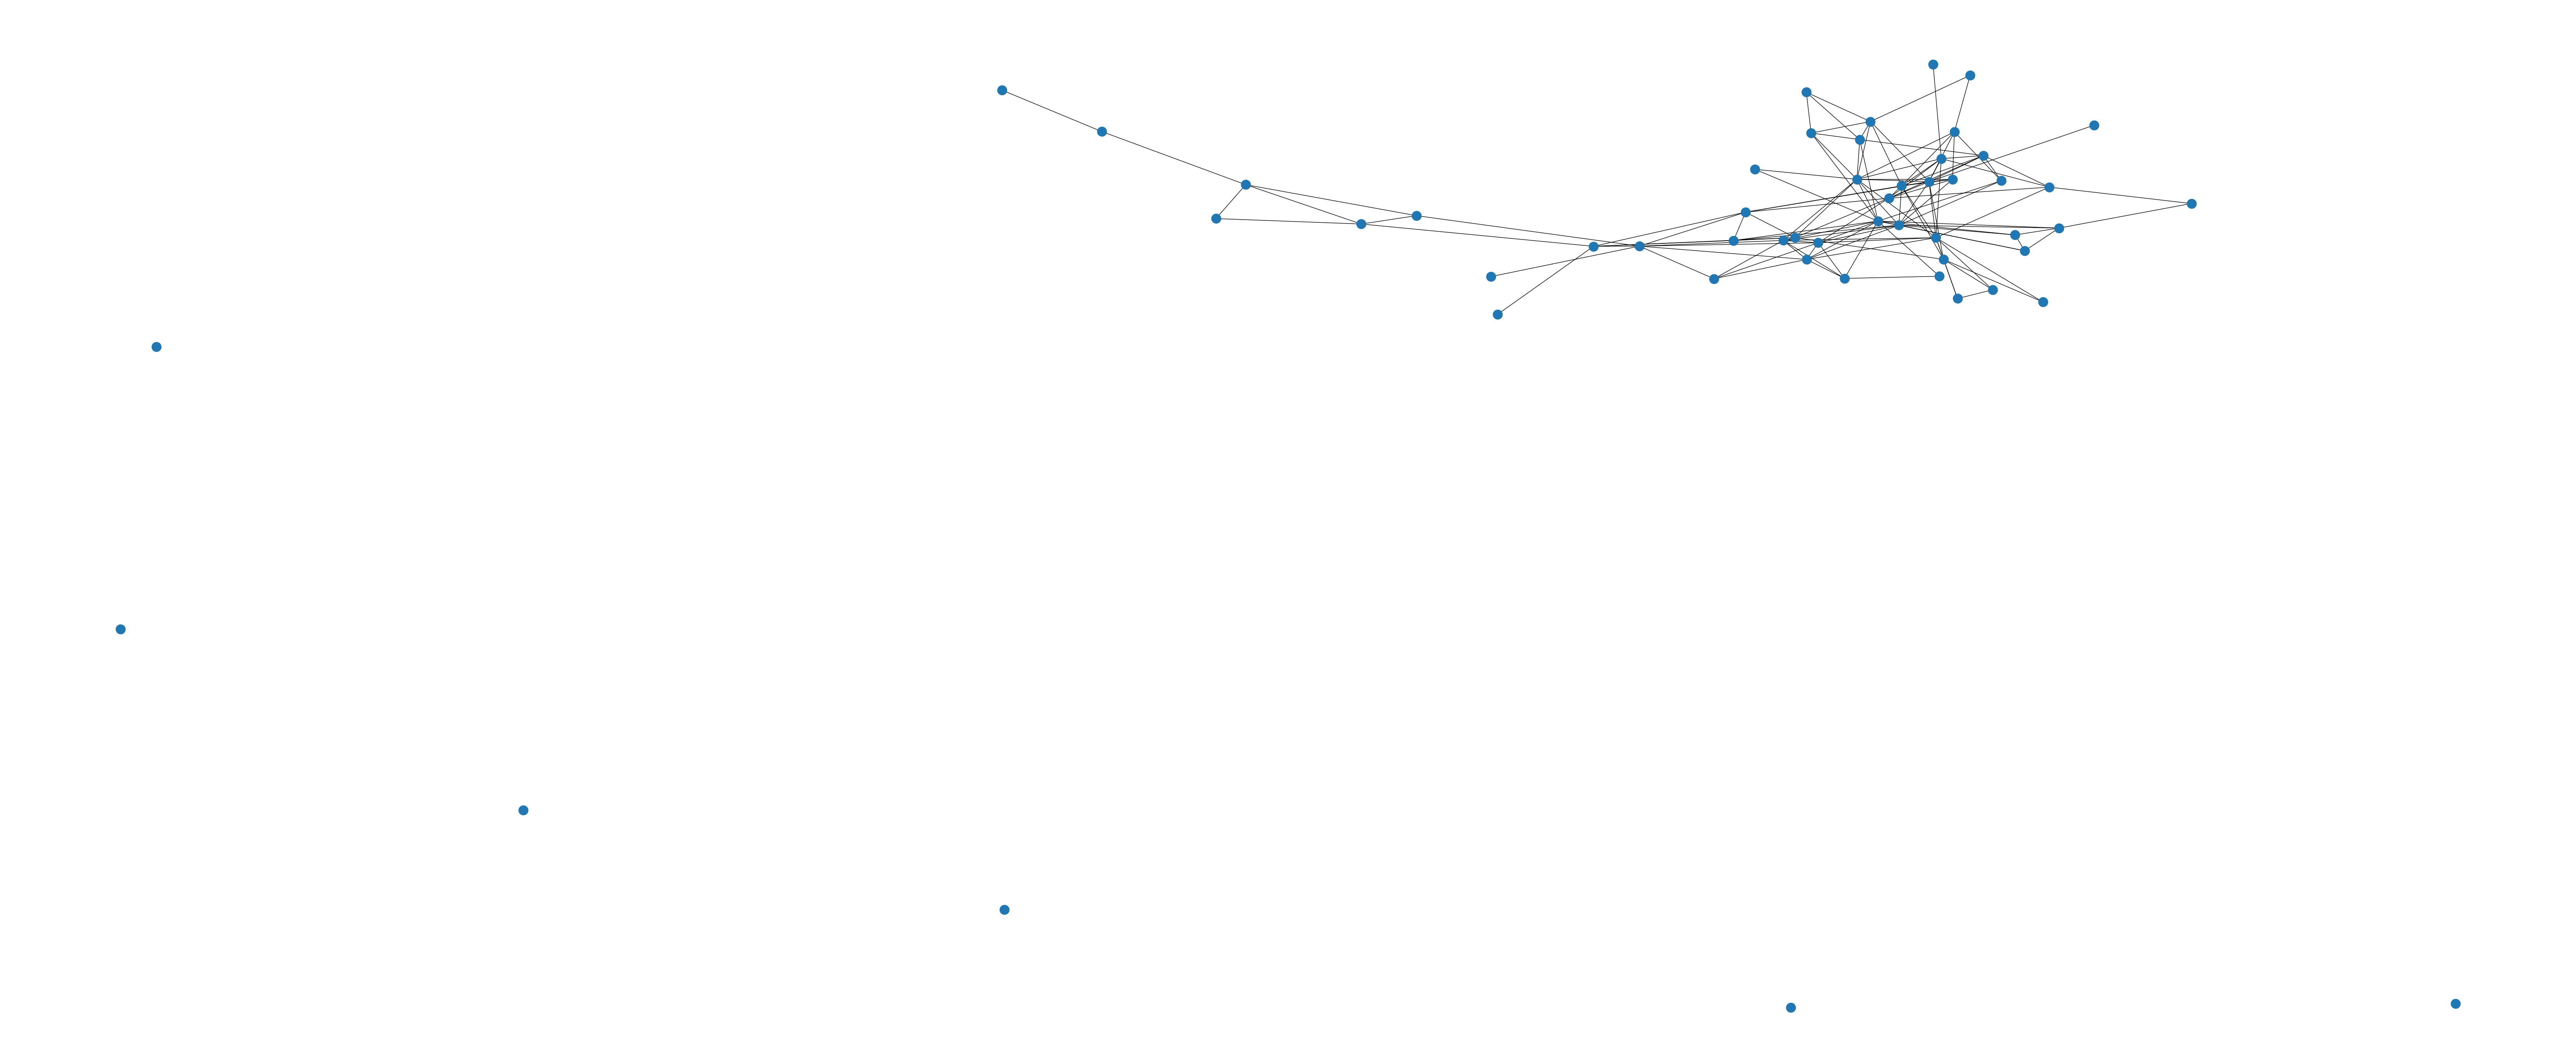

In [71]:
##Visualizing New Network
fig_dims = (85, 35)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G1, )

### Creating a graph that only includes the relationships of executing serious crimes (edge values of 3 and 4)

In [72]:
edges2 = edges.replace([1,2],0)
G2 = nx.from_pandas_adjacency(edges2)
node_attr = data.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G2, node_attr)
G2

In [73]:
print("Assortativity coefficient of Attribute Country: \n", nx.attribute_assortativity_coefficient(G2,'Country'))

Assortativity coefficient of Attribute Country: 
 0.40699075934110085


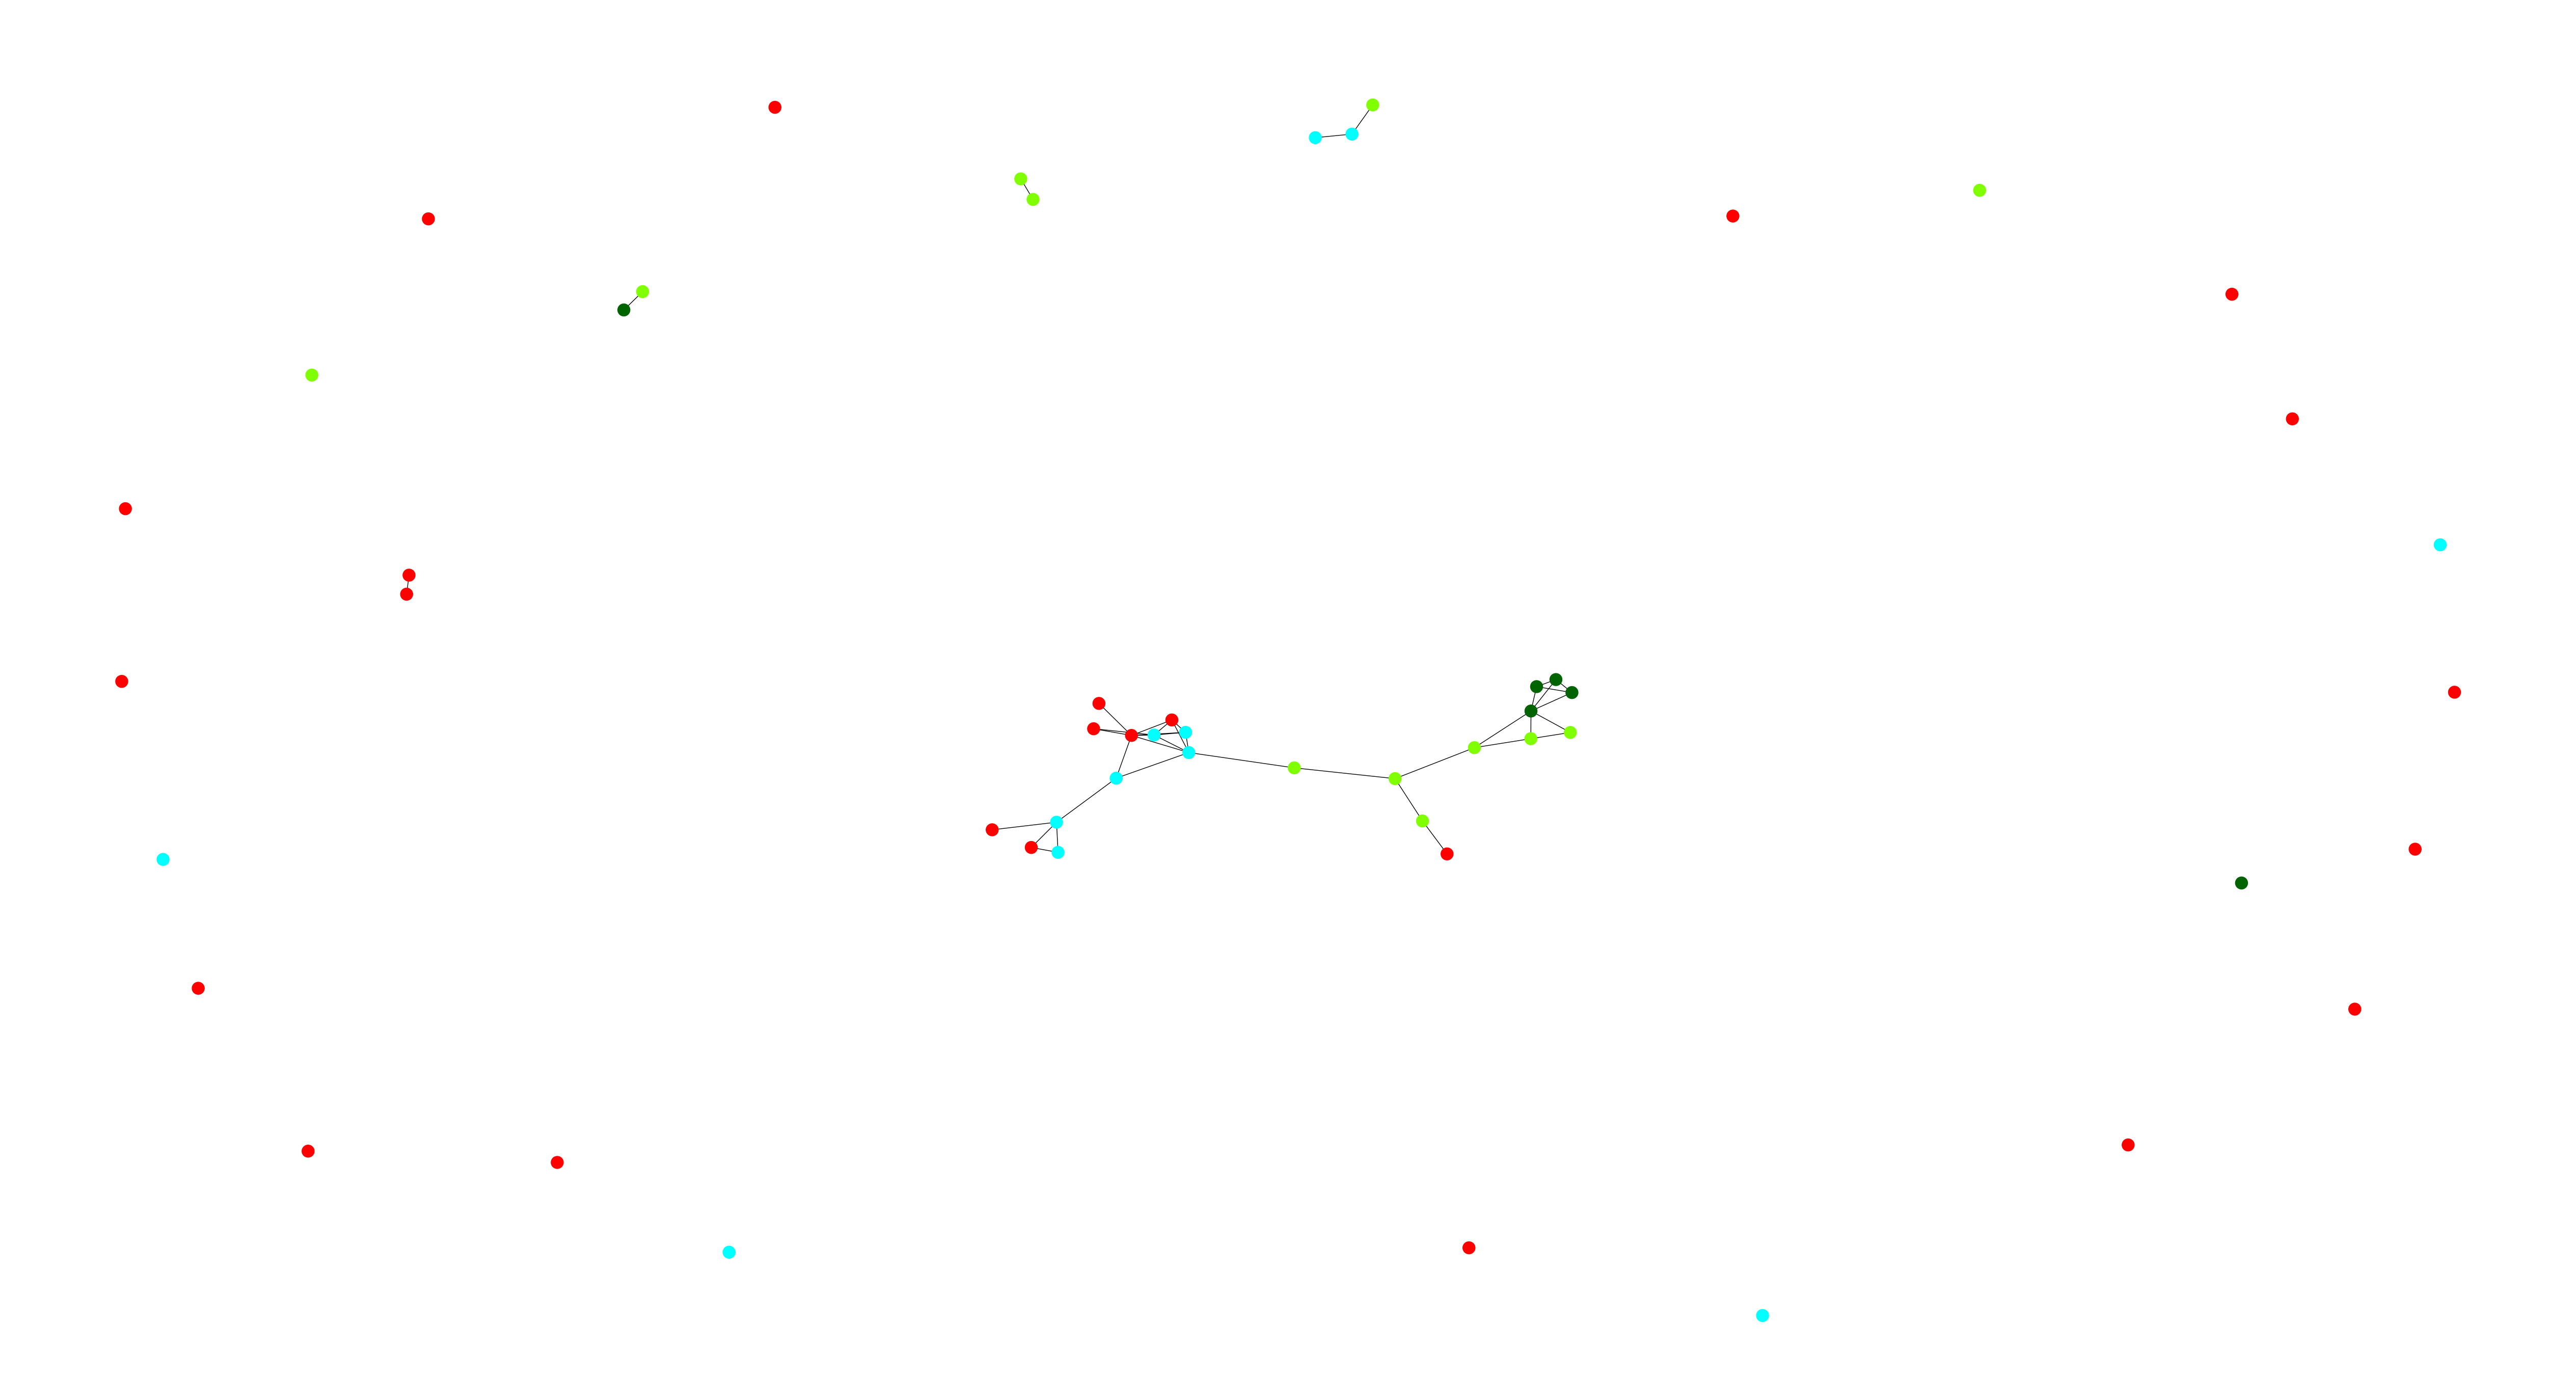

In [74]:
##Visualizing the new network. Colors are used to distinguish the different birthplaces:
node_color=[]
for node in G2.nodes(data=True):

    # if the node has the attribute group1
    if 'West Africa' in node[1]['Country']:
        node_color.append('chartreuse')              ####WEST AFRICA--> GREEN

    # if the node has the attribute group1
    elif 'East Africa' in node[1]['Country']:
        node_color.append('darkgreen')              ####EAST AFRICA--> DARK GREEN

    # if the node has the attribute group1
    elif 'UK' in node[1]['Country']:
        node_color.append('red')                    ####UK ---> RED

    # if the node has the attribute group1
    elif 'Caribbean' in node[1]['Country']:
        node_color.append('aqua')                   ###CARIBBEAN ---> BLUE


fig_dims = (65, 35)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G2, node_color=node_color, )

### Creating a graph that only includes the relationships of executing serious crimes and being family (edge values of 4)

In [75]:
edges_crimes = edges.replace([1,2,3],0)
G3 = nx.from_pandas_adjacency(edges_crimes)
node_attr = data.set_index('Id').to_dict('index') #creating dictionary to pass for the set attributes function
nx.set_node_attributes(G3, node_attr)
G3

In [76]:
print("Assortativity coefficient of Attribute Country: \n", nx.attribute_assortativity_coefficient(G3,'Country'))

Assortativity coefficient of Attribute Country: 
 0.8160919540229885


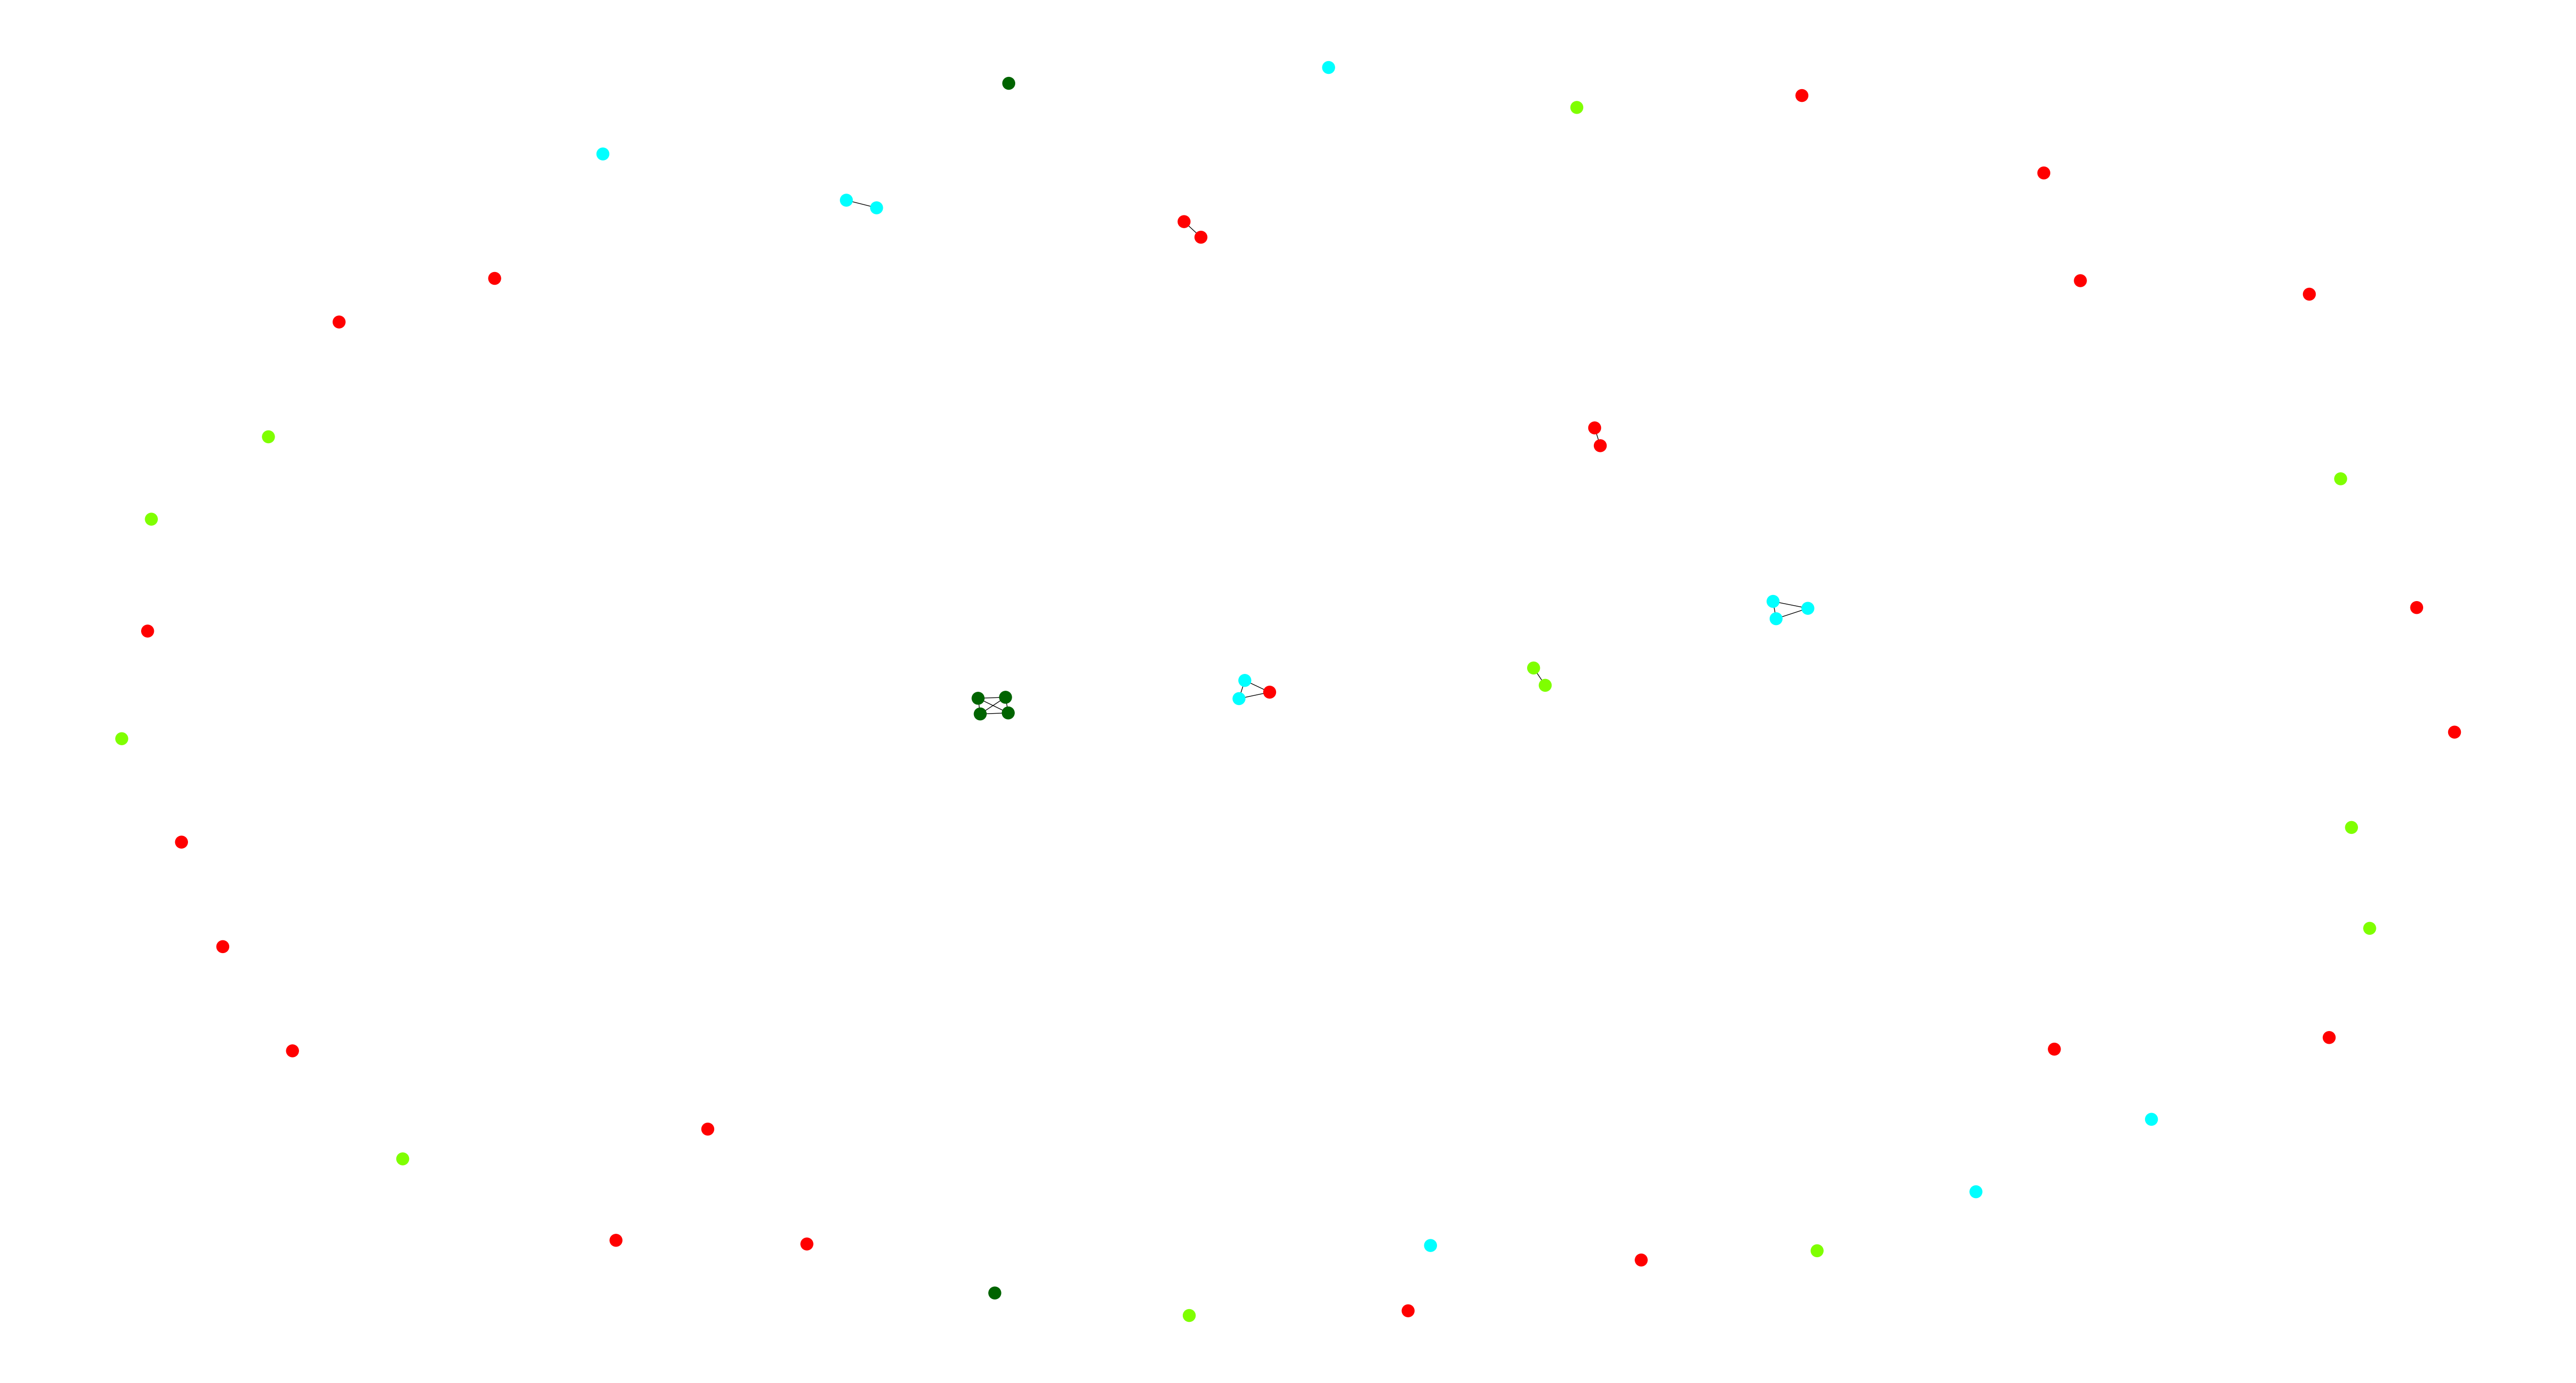

In [77]:
##Visualizing the new network

node_color=[]
for node in G3.nodes(data=True):

    # if the node has the attribute group1
    if 'West Africa' in node[1]['Country']:
        node_color.append('chartreuse')

    # if the node has the attribute group1
    elif 'East Africa' in node[1]['Country']:
        node_color.append('darkgreen')

    # if the node has the attribute group1
    elif 'UK' in node[1]['Country']:
        node_color.append('red')

    # if the node has the attribute group1
    elif 'Caribbean' in node[1]['Country']:
        node_color.append('aqua')


fig_dims = (65, 35)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw(G3, node_color=node_color,)

## Capturing the Max Number of Clique- K-Clique

In [78]:
##Finding the maximum cliques:

max_cliques=[]
max_clique_size = max(len(c) for c in nx.find_cliques(G))
for clique in nx.find_cliques(G):
    if len(clique)== max_clique_size:
        max_cliques.append(clique)
max_cliques

[[1, 7, 12, 2, 9, 10, 21, 22, 29, 8, 11, 23],
 [1, 7, 12, 2, 9, 10, 21, 22, 29, 25, 11, 23]]

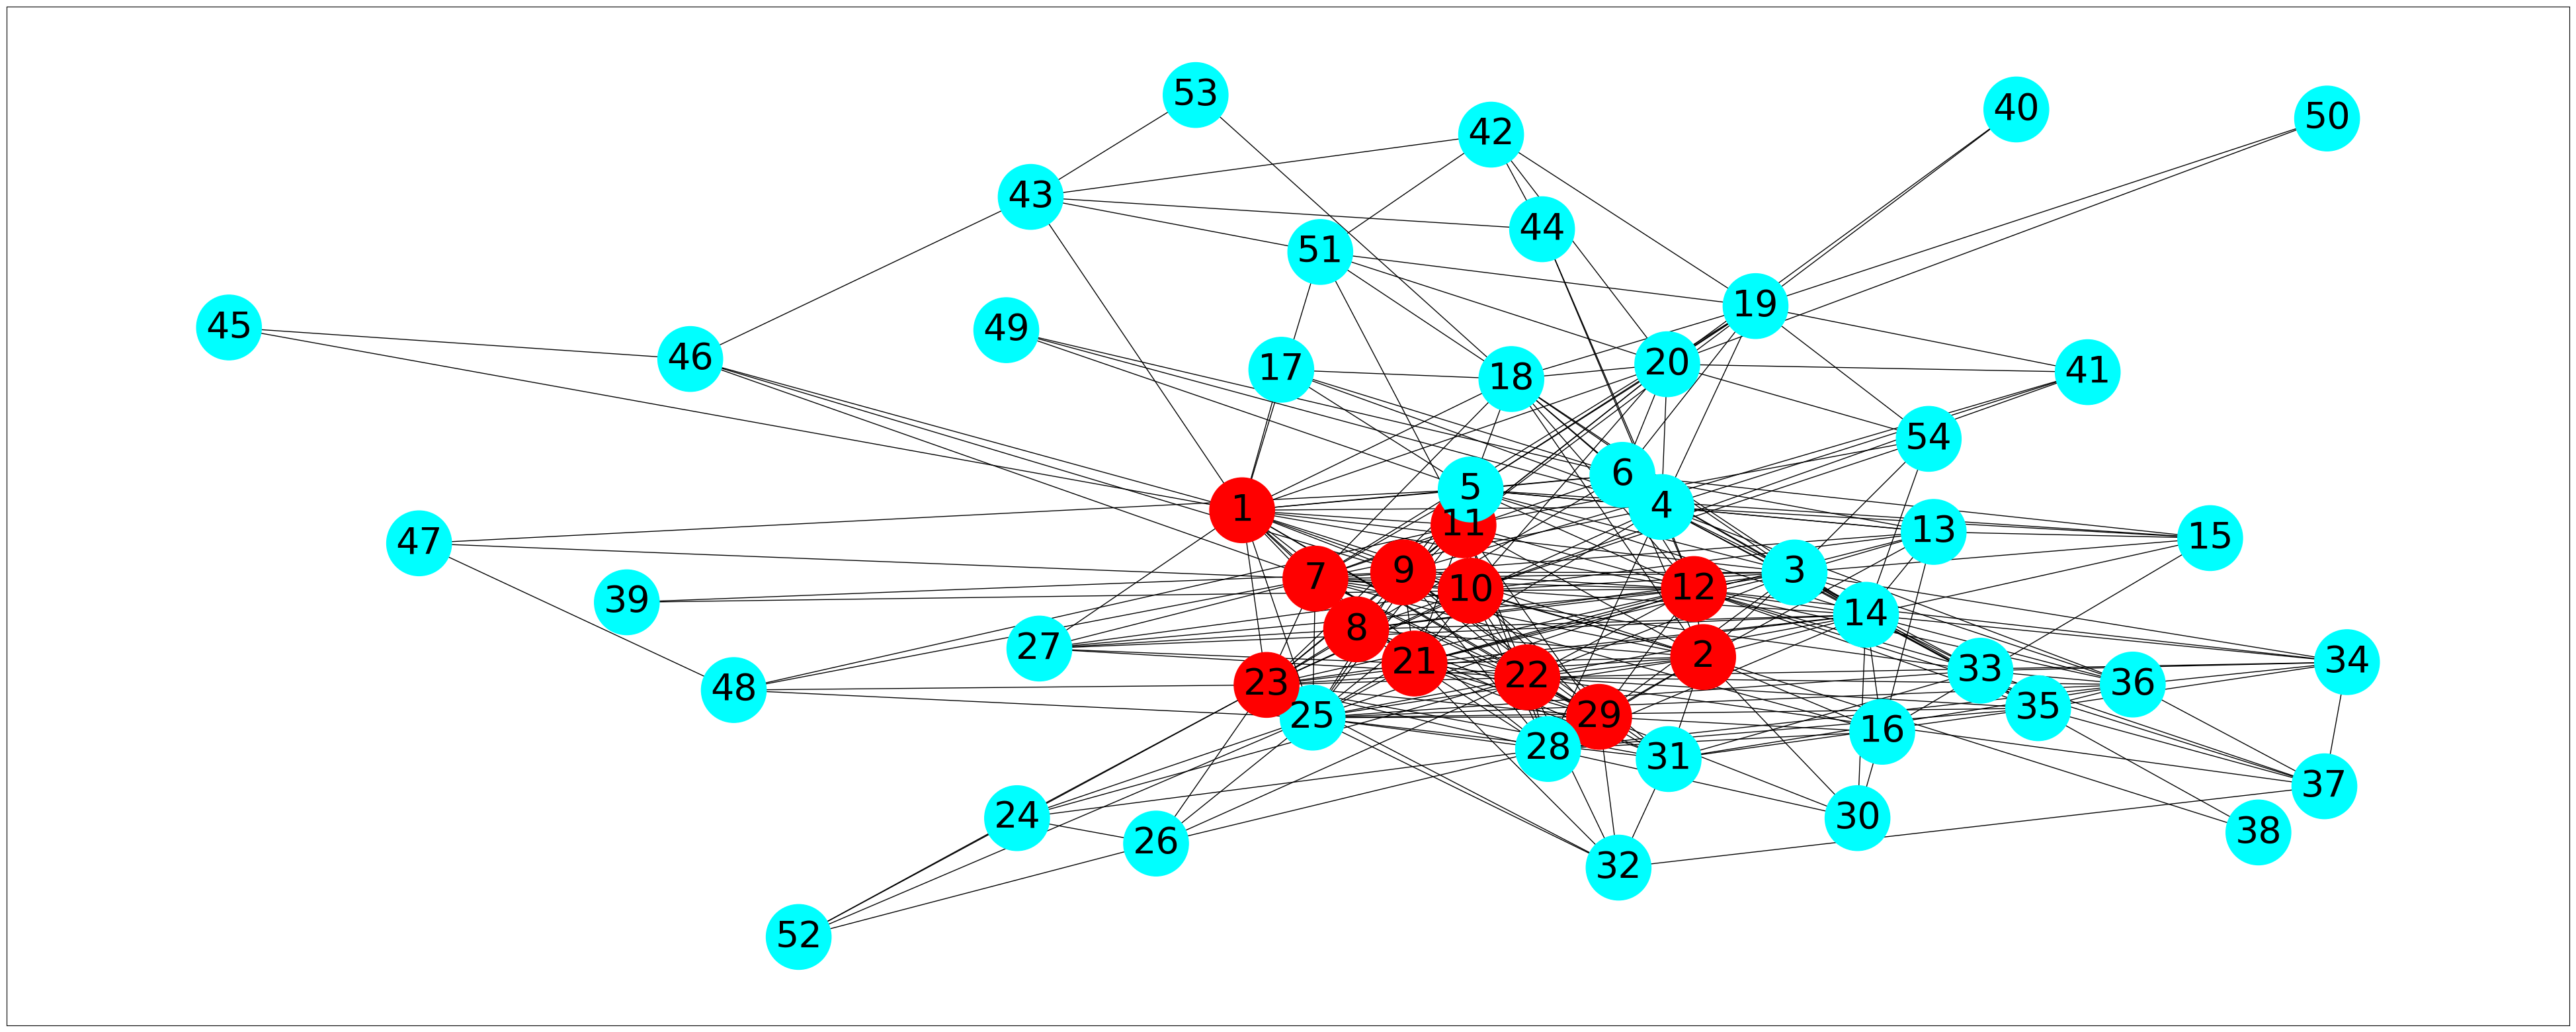

In [79]:
##Visualizing the maximum cliques:

node_color=[]
for node in G.nodes(data=True):

    if  node[0] in max_cliques[0]:
        node_color.append('red')

    else:
        node_color.append('aqua')
np.random.seed(1)
fig_dims = (50,20)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G, node_color=node_color, node_size =5000, font_size =40)

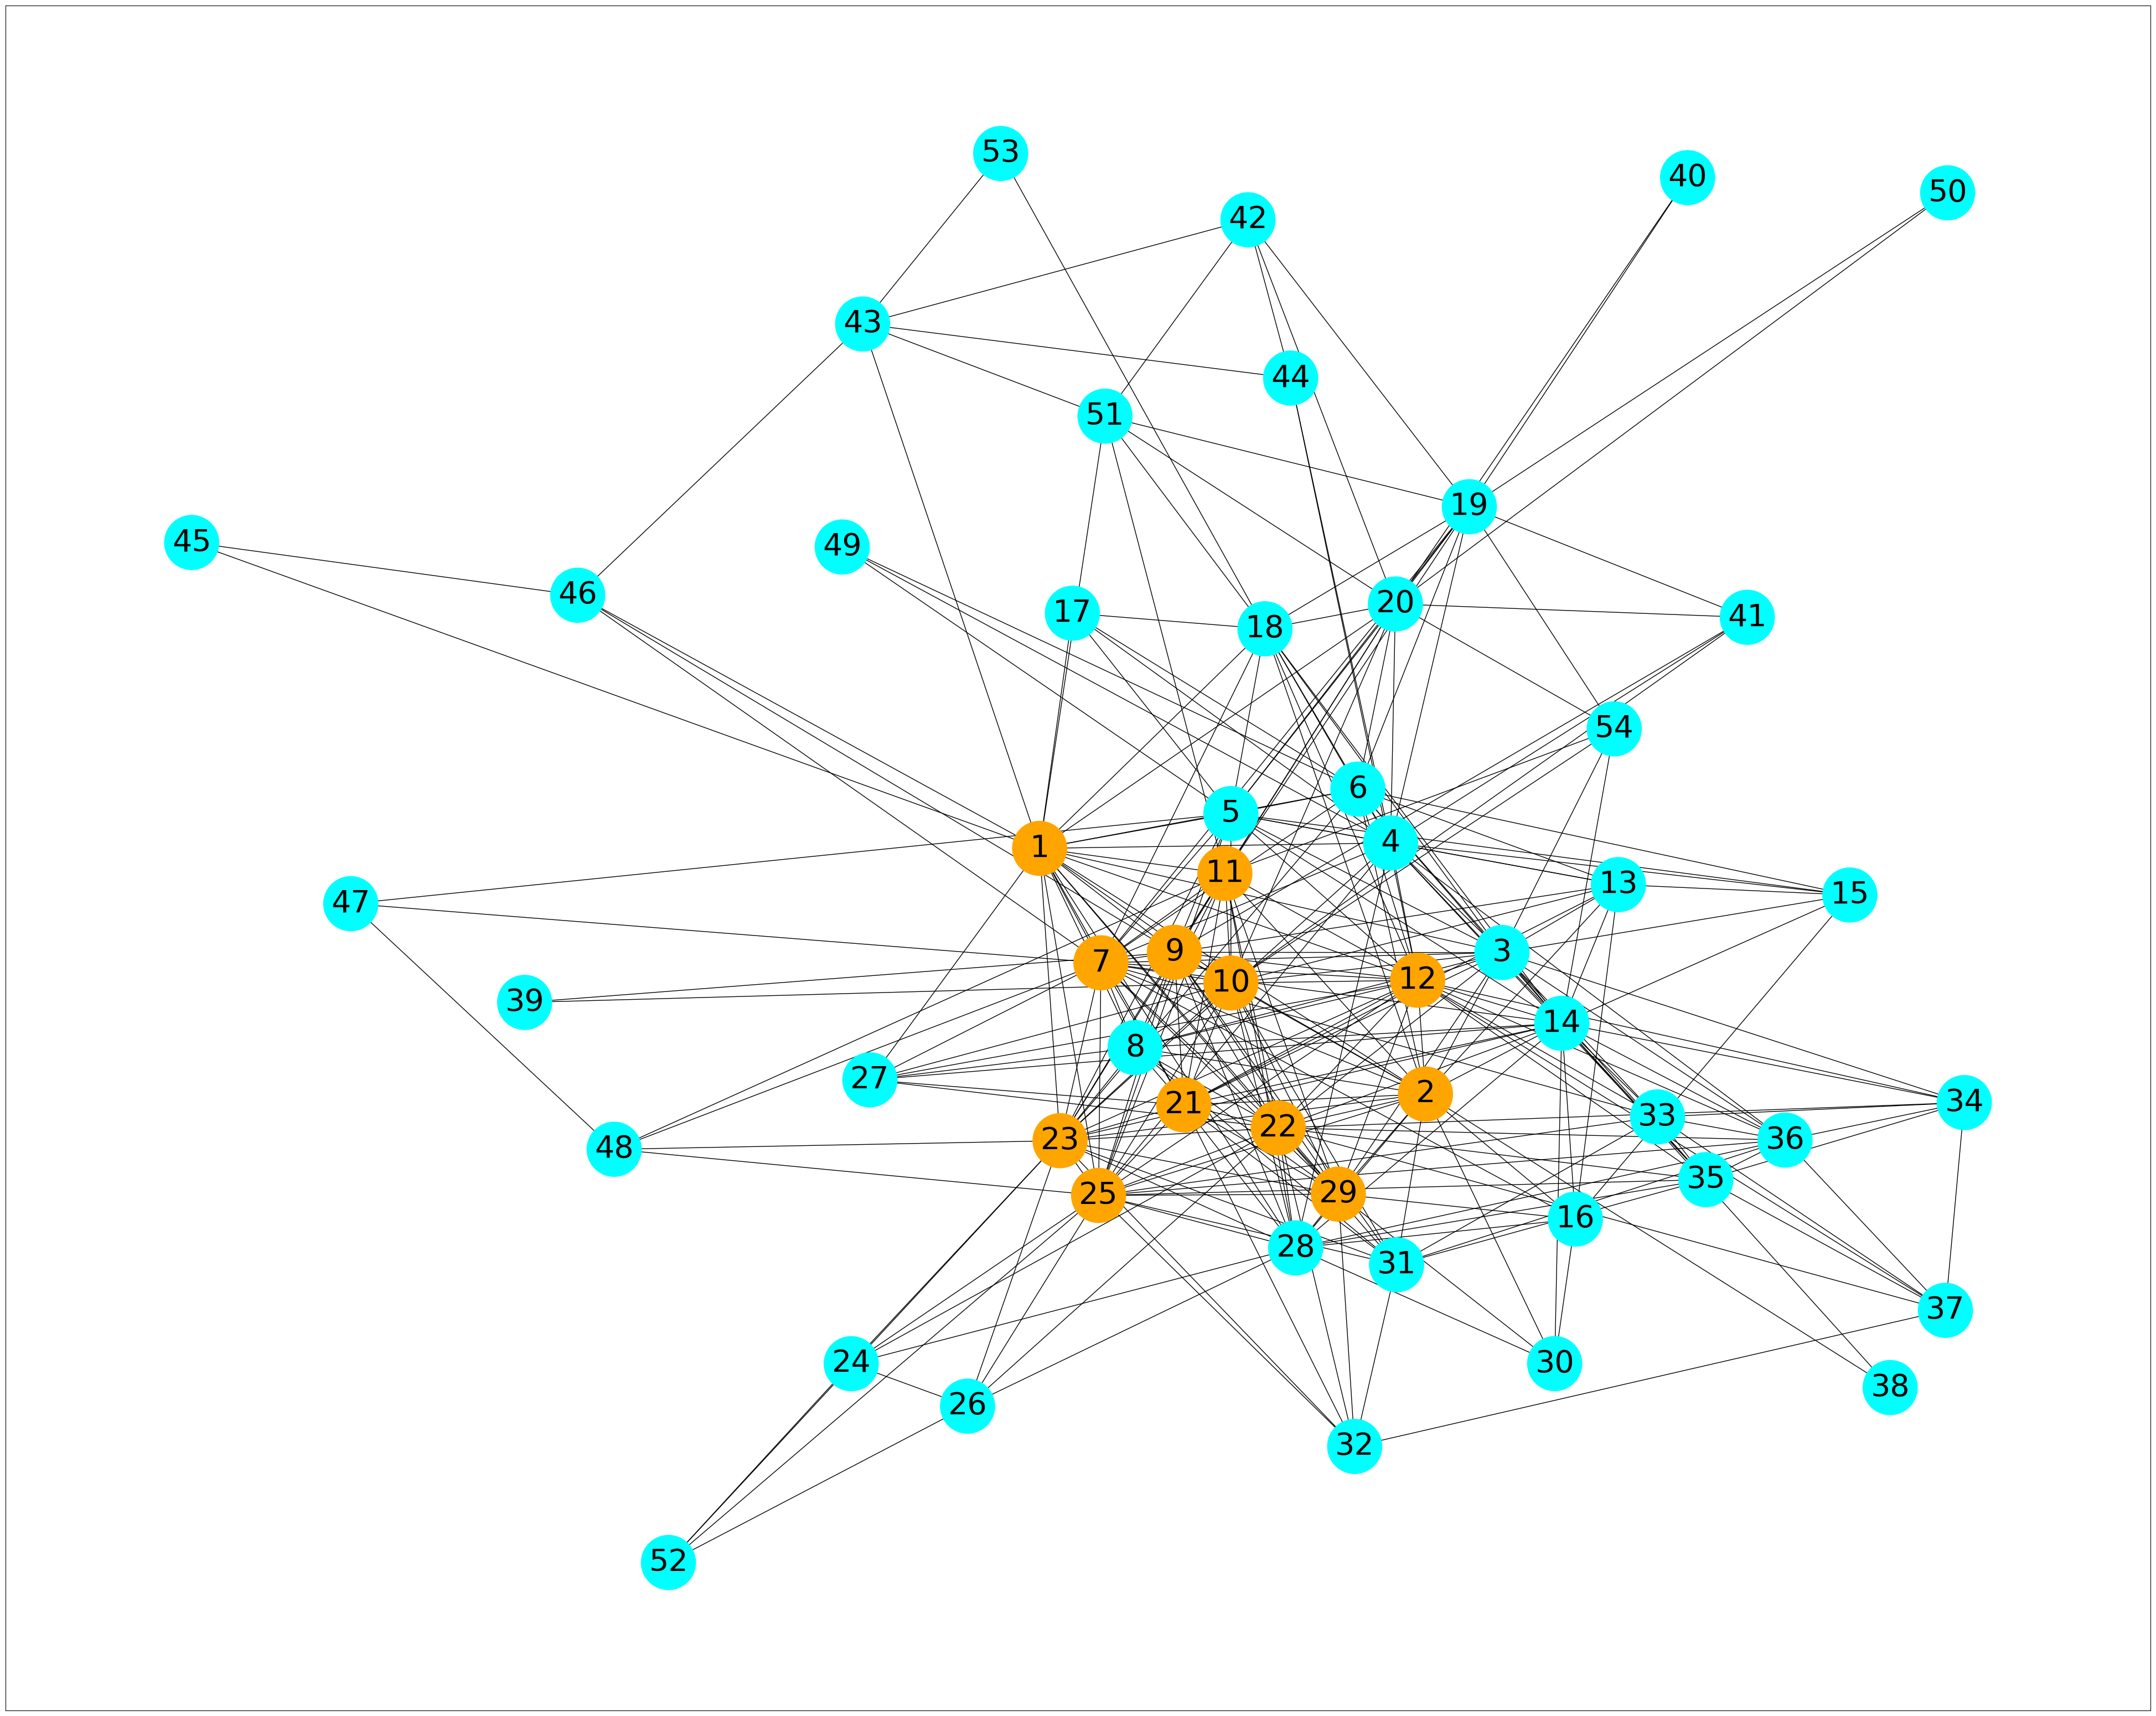

In [80]:
node_color=[]
for node in G.nodes(data=True):

    if  node[0] in max_cliques[1]:
        node_color.append('orange')

    else:
        node_color.append('aqua')
np.random.seed(1)
fig_dims = (50, 40)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G, node_color=node_color, node_size =5000, font_size =40 )
plt.show()

In [81]:
##Finding all possible cliques

for clique in nx.find_cliques(G):
    print(clique)

[1, 7, 12, 2, 9, 10, 21, 22, 29, 8, 3]
[1, 7, 12, 2, 9, 10, 21, 22, 29, 8, 11, 23]
[1, 7, 12, 2, 9, 10, 21, 22, 29, 25, 11, 23]
[1, 7, 12, 2, 18, 3, 6]
[1, 7, 12, 2, 6, 23]
[1, 7, 12, 27, 8, 10, 21, 22]
[1, 7, 12, 4, 5, 25, 23]
[1, 7, 12, 4, 5, 6, 18, 3]
[1, 7, 12, 4, 5, 6, 23]
[1, 7, 12, 5, 9, 10, 25, 23]
[1, 7, 12, 5, 9, 10, 3]
[1, 7, 46, 9]
[1, 43, 51]
[1, 43, 46]
[1, 45, 46]
[1, 17, 18, 4, 5, 6]
[1, 51, 20, 18]
[1, 51, 20, 11]
[1, 20, 11, 9, 10]
[1, 20, 5, 9, 10]
[1, 20, 5, 4, 18, 6]
[1, 28, 23, 25, 2, 9, 10, 29, 11, 21, 22]
[1, 28, 23, 25, 4]
[13, 16, 14, 2]
[13, 16, 14, 15]
[13, 3, 2, 21, 9, 10]
[13, 3, 2, 21, 14]
[13, 3, 2, 6, 14]
[13, 3, 5, 9, 10]
[13, 3, 5, 4, 15, 6, 14]
[14, 3, 12, 34, 35, 36, 33]
[14, 3, 12, 34, 35, 36, 22]
[14, 3, 12, 35, 4, 36]
[14, 3, 12, 7, 33]
[14, 3, 12, 7, 2, 8, 21, 22]
[14, 3, 12, 7, 2, 18, 6]
[14, 3, 12, 7, 4, 18, 5, 6]
[14, 3, 54]
[14, 38, 2]
[14, 16, 2, 28, 30]
[14, 16, 2, 7]
[14, 23, 28, 2, 21, 22]
[14, 23, 28, 4]
[14, 23, 7, 12, 2, 8, 21, 22]
[1

## Capturing the Max Number of Components- K-Components

### G2 COMPONENTS

In [82]:
##COMPONENTS OF G2
print("Components number:", nx.number_connected_components(G2))

Components number: 27


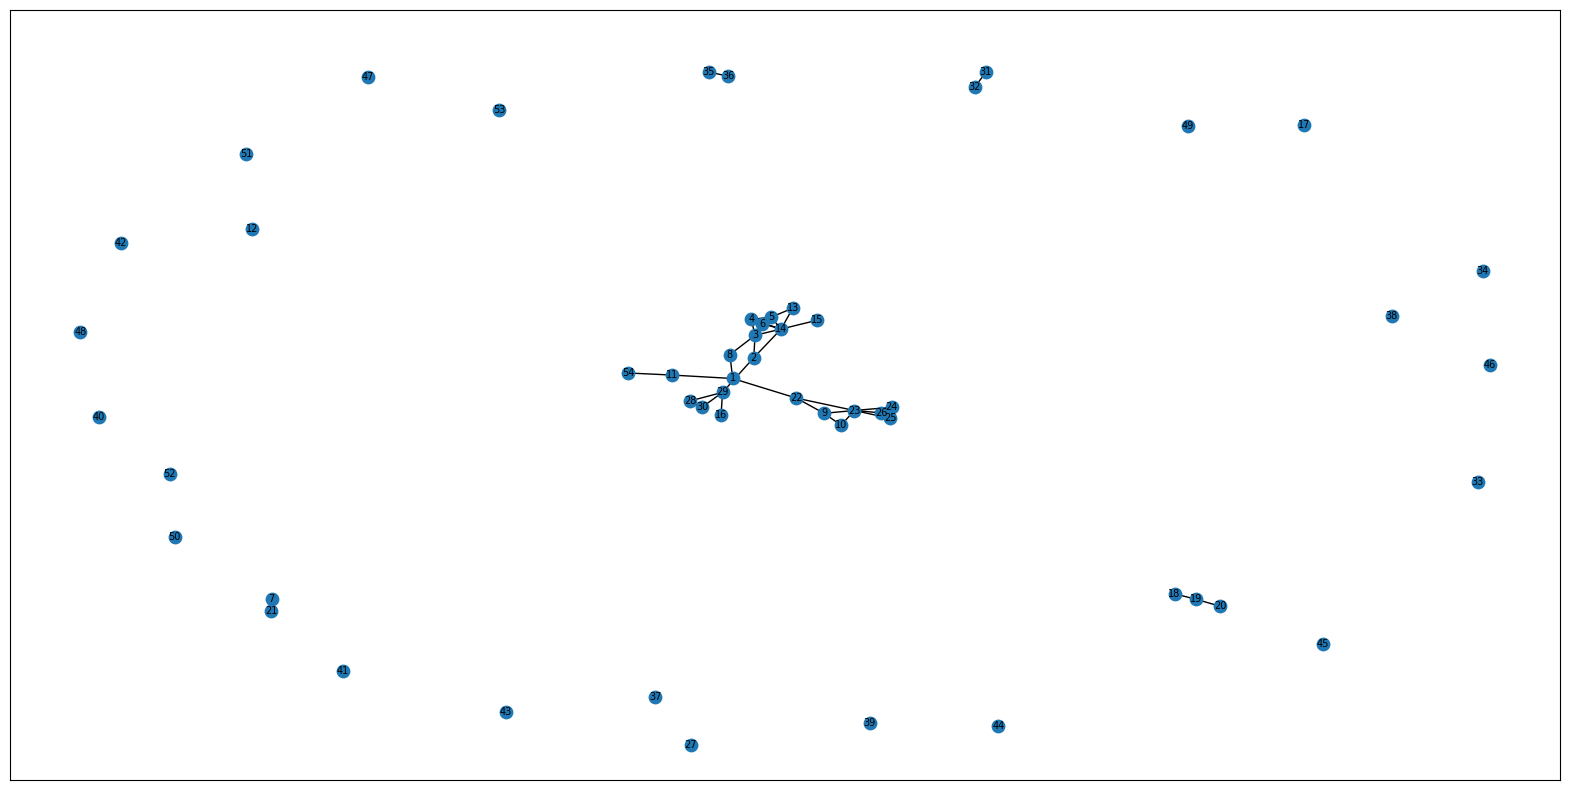

In [83]:
np.random.seed(2)
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
nx.draw_networkx(G2, node_size=80, font_size =7)
plt.show()

### G3 COMPONENTS

In [84]:
##COMPONENTS OF G3
print("Components number:", nx.number_connected_components(G3))

Components number: 43


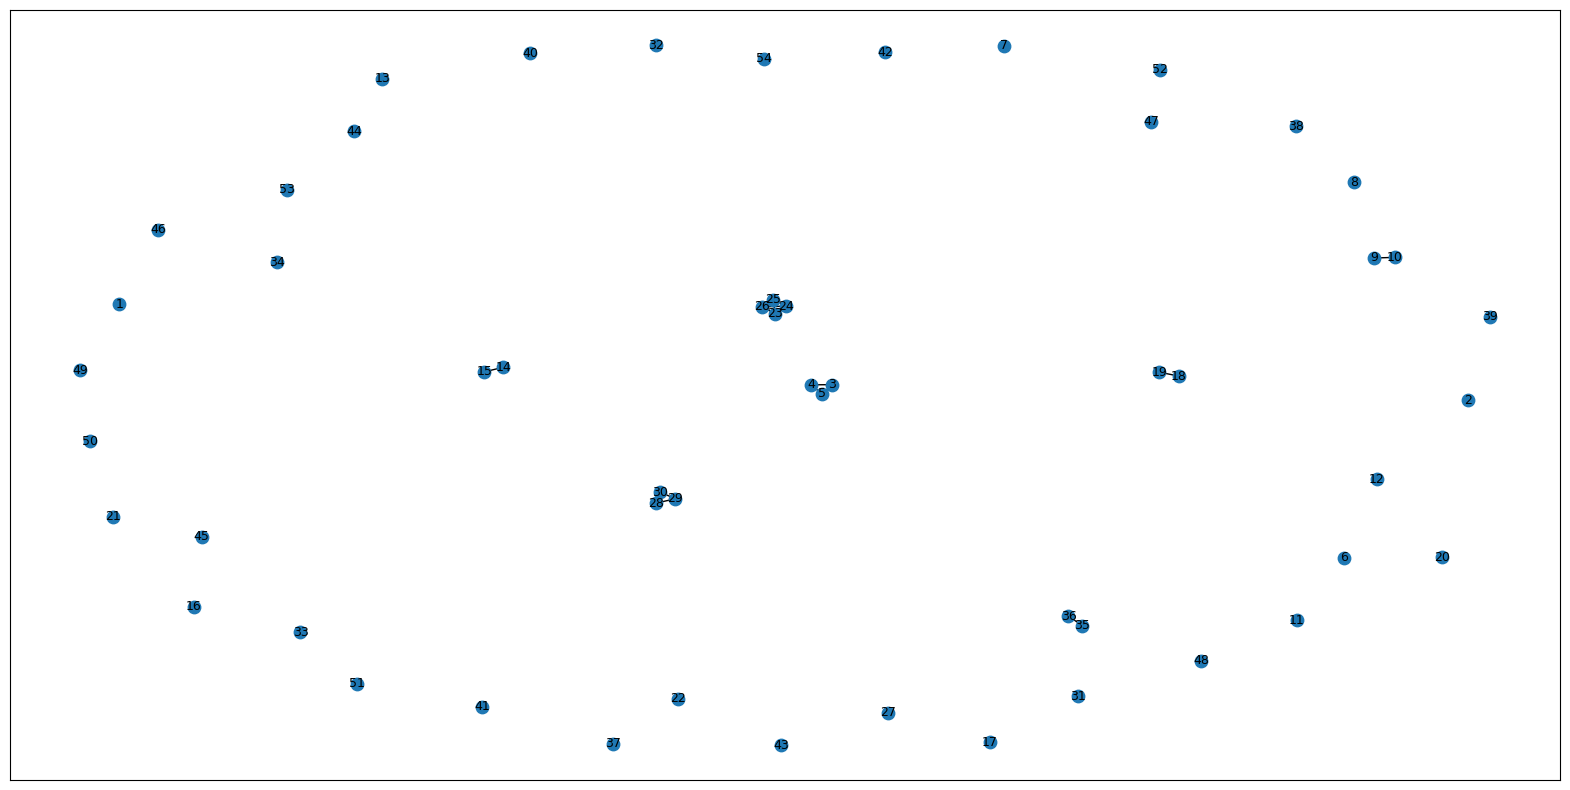

In [85]:
##Components of relationships of co-offending serious crimes
np.random.seed(3)
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims,)
nx.draw_networkx(G3, node_size=80, font_size =9)
plt.show()